# Descripción de variables

* Carat: quilates. 0.2 gramos es igual a un quilate y se dividen en puntos. Un diamante que pesa 0.5 quilates es igual a 50 puntos
* Cut: Calidad de corte, dividido en cinco categorías de menor a mayor calidad
* Color: Suele dividirse en 7 categorías más comunes y van desde el más valioso D hasta el menos valioso J
* Clarity: Se clasifica en 10 niveles los cuales se agrupan en 5 categorías principales IF es la categoría más valiosa e I3 es la menos valiosa
* Depth: se refiere a la altura de un diamante desde la cintura hasta la parte superior de la mesa. Se expresa como porcentaje
* Table: Parte superior, plana del diamante. Se expresa como porcentaje
* Price: Precio del diamante
* X: largo medido en milimetros
* Y: ancho medido en milimetros
* Z: profundidad medido en milimetros


**EL OBJETIVO ES OBTENER UN MODELO CAPAZ DE PREDECIR EL PRECIO DE LOS DIAMANTES**

# Librerías

In [1]:
# Manejo de datos
# ============================================
import numpy as np
import pandas as pd

# Modelos
# ============================================
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Visualización
# ============================================
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6
import seaborn as sns
sns.set_style("darkgrid")

# Configuración de alertas
# ===========================================
import warnings
warnings.filterwarnings('ignore')

/home/mario/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/home/mario/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# Análisis exploratorio

### Cargando datos

In [2]:
# Lactura de las primeras filas del dataset
# ============================================
data_raw = pd.read_csv("/home/mario/Proyectos_Mario/Regresion_lineal/Diamonds_Prices2022.csv")
data_raw.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# Se renombran las columnas x, y, z, para 
# más comodidad en el manejo de los datos
data_raw.rename(columns={"x": "length", "y": "width", "z": "deep"}, inplace=True)
data_raw.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,length,width,deep
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# información sobre cada columna
# ==================================
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   length      53943 non-null  float64
 9   width       53943 non-null  float64
 10  deep        53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Todas las columnas tienen el tipo adecuado

In [5]:
# La columna Unnamed: 0 no tiene valor para el 
# análisis, por lo que se eliminará
data_raw.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
# Dimensiones del dataset
# ==========================
data_raw.shape

(53943, 10)

In [7]:
# Identificación de datos nulos
#================================
data_raw.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
length     False
width      False
deep       False
dtype: bool

No se cuenta con datos nulos en el dataset

### Análisis de variables numéricas

Dado que el propósito del modelo es predecir el precio de los diamantes, Se establece como variable objetivo a la variable precio

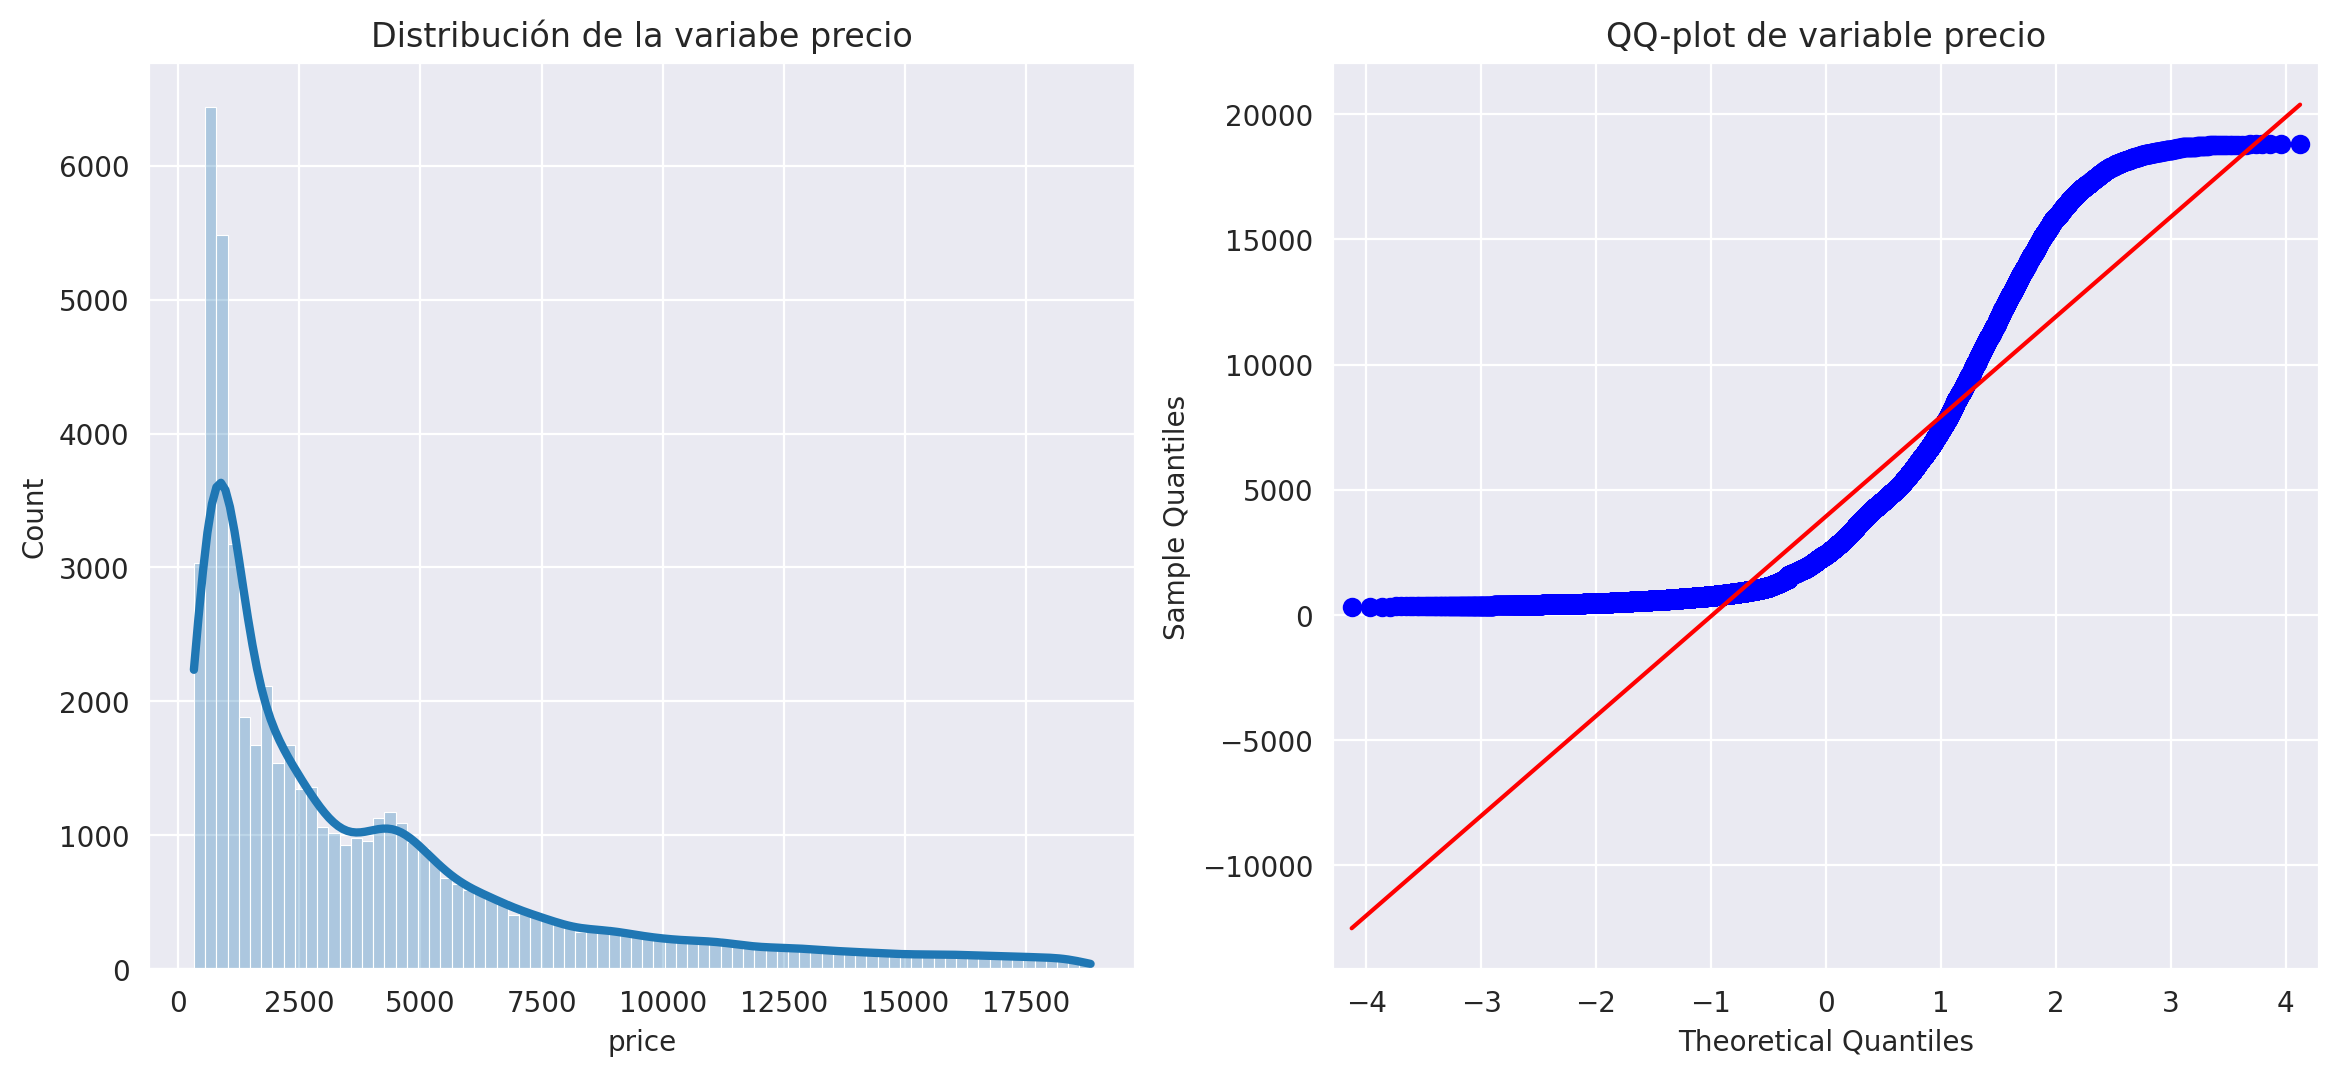

In [8]:
# Análisis de variable objetivo
# ===============================
fig, axes = plt.subplots(ncols=2, figsize=(14, 6), dpi=200)
sns.histplot(data_raw.price, kde=True, alpha=0.3,
             line_kws={'linewidth': 3}, ax=axes[0])
axes[0].set_title("Distribución de la variabe precio")
qqplot = sm.qqplot(data_raw.price, line="s", ax=axes[1])
axes[1].set_title("QQ-plot de variable precio")
plt.show()

La variable precio no se distribuye de manera normal. En su lugar presenta un marcado sesgo hacia la derecha.

Dado que es deseable que la variable objetivo se distribuya de manera normal para ayudar al ajuste del modelo, se puede aplicar una transformación logarítmica

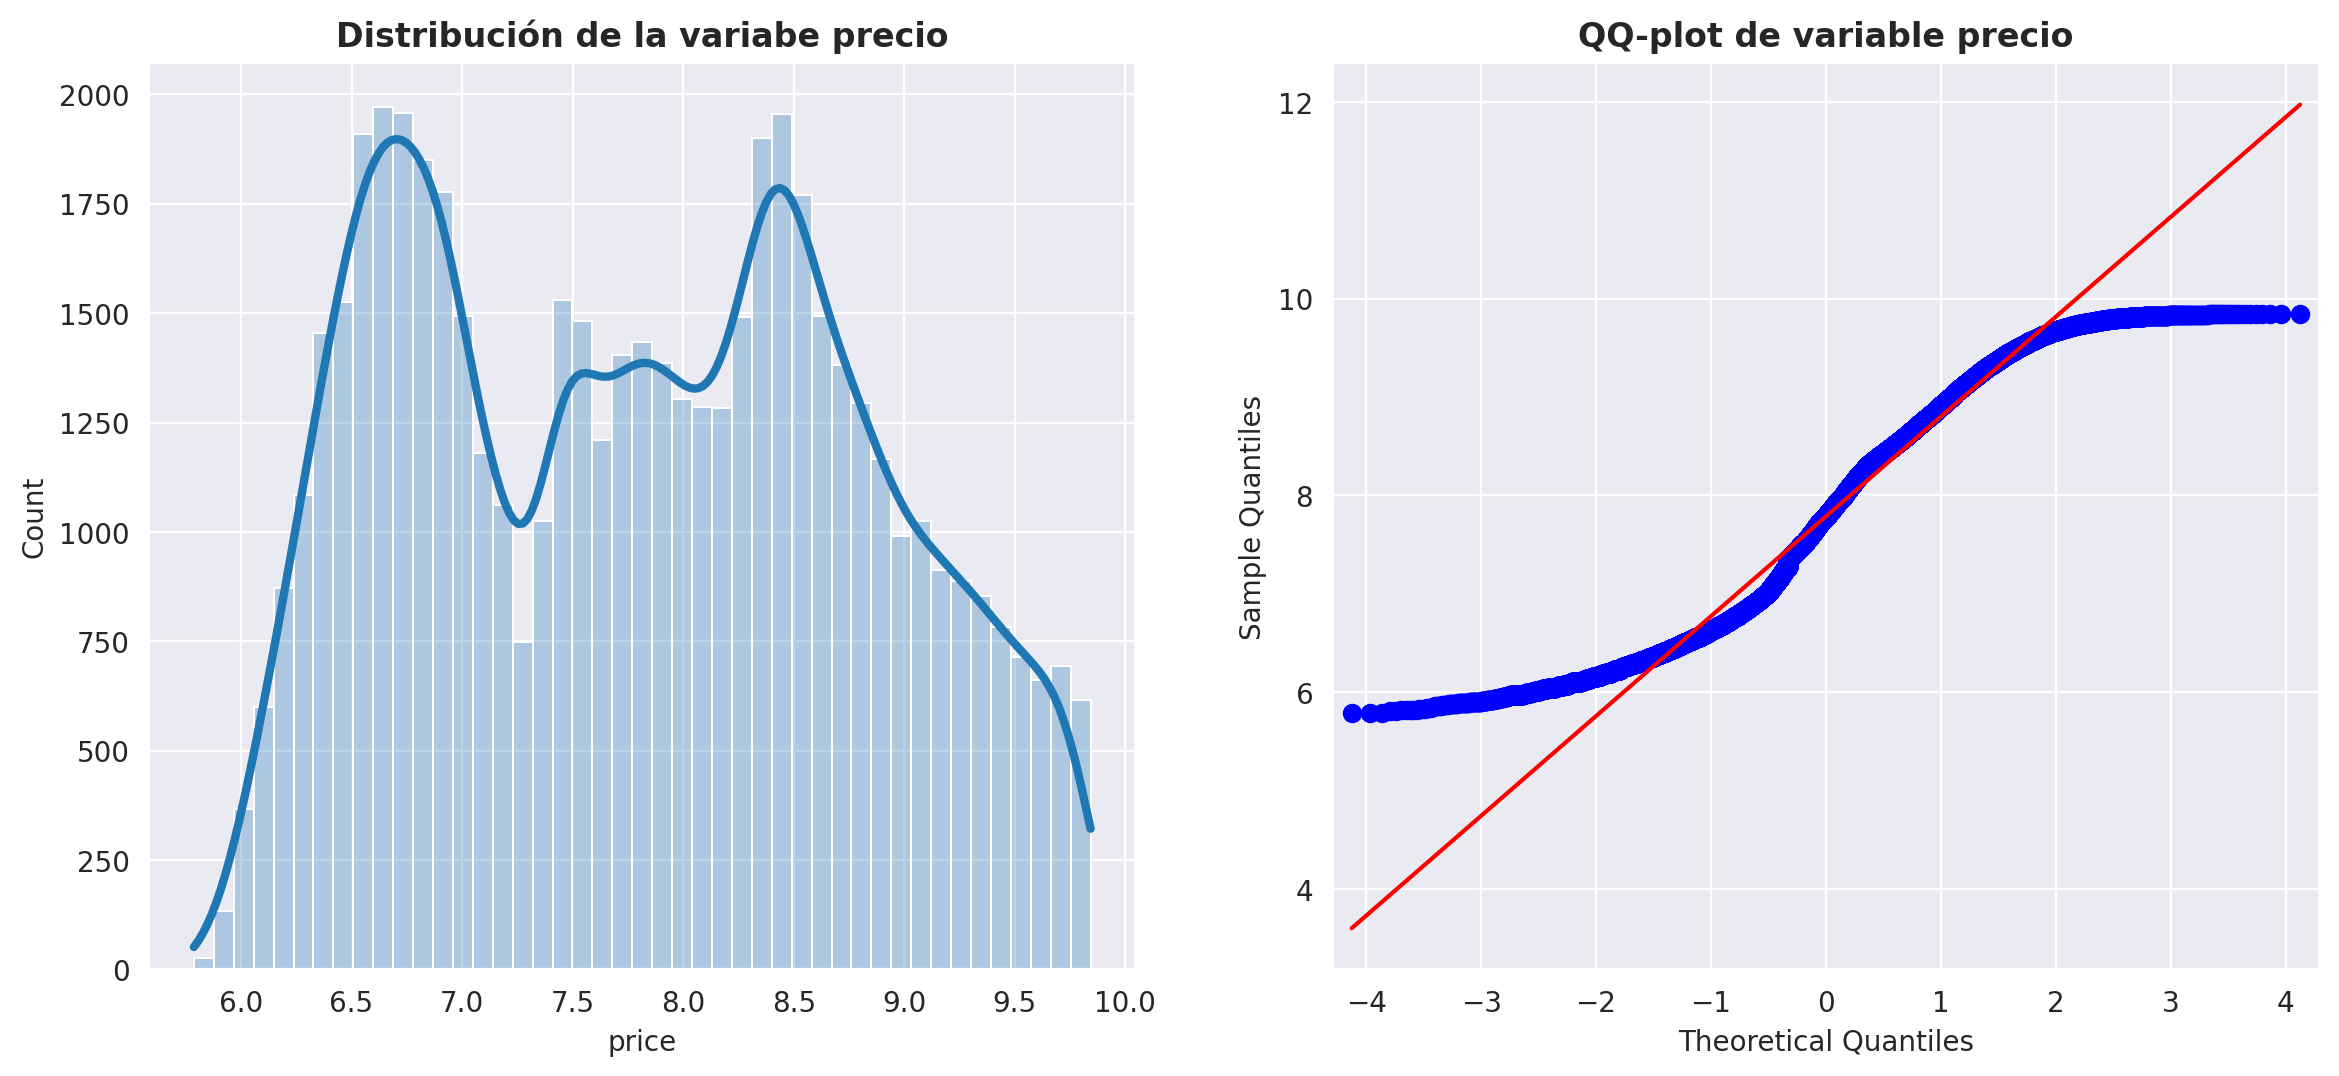

In [9]:
# Se aplica logaritmo a la variable objetivo
# ==============================================
fig, axes = plt.subplots(ncols=2, figsize=(14, 6), dpi=200)
sns.histplot(np.log(data_raw.price), kde=True, alpha=0.3,
             line_kws={"linewidth": 3}, ax=axes[0])
axes[0].set_title("Distribución de la variabe precio",
                  fontweight="bold")
qqplot = sm.qqplot(np.log(data_raw.price), line="s", ax=axes[1])
axes[1].set_title("QQ-plot de variable precio",
                  fontweight="bold")
plt.show()

Se puede observar una distribución más cercana a la normal después de aplicar logartimos

In [10]:
# Variables numéricas
# ========================
data_raw.select_dtypes(include=["float", "int"]).describe()

,carat,depth,table,price,length,width,deep
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Las características largo, ancho y profundidad medidas en centímetros presentan valores de cero, lo cual no tiene sentido para las medidas de ningún diamante. 

Puesto que estos valores representan un porcentaje muy pequeño respecto a la muestra total, lo mejor es eliminarlos

In [11]:
# Eliminar los valores cero de las variables de dimensión
# ===========================================================
# Se crean series que contengan los indices de los ceros de cada variable
length_zero = pd.Series(data_raw[(data_raw["length"] == 0)].index)
width_zero = pd.Series(data_raw[ (data_raw["width"] == 0)].index)
deep_zero = pd.Series(data_raw[(data_raw["deep"] == 0)].index)
# Se juntan en una sola serie
zeros = pd.concat([length_zero, width_zero, deep_zero])
#Se eliminan las filas seleccionadas
data = data_raw.drop(index=zeros)

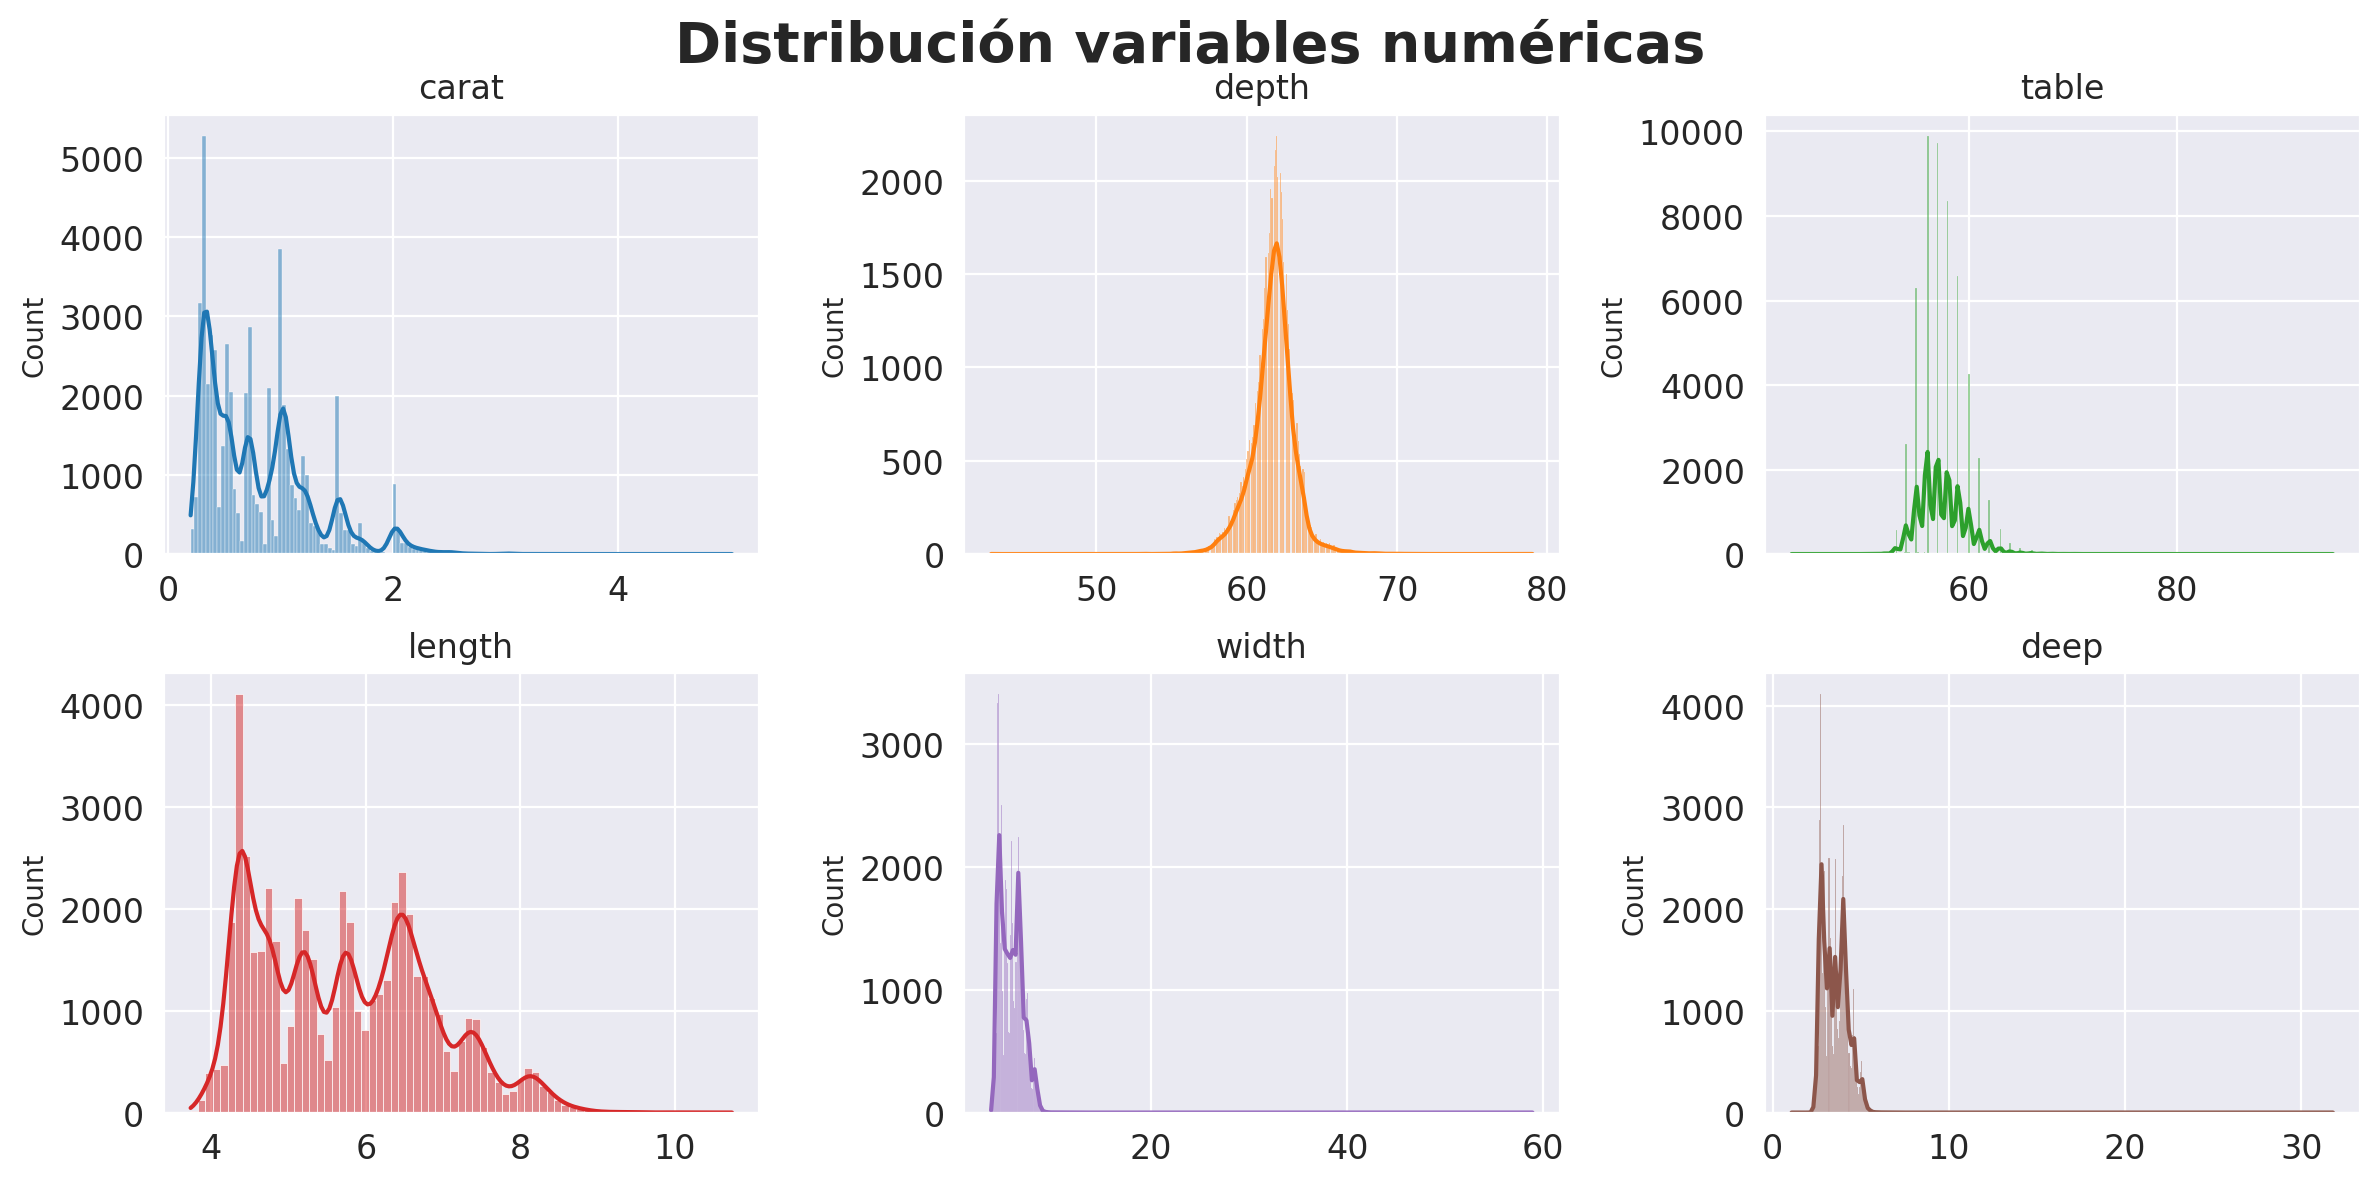

In [12]:
# Distribución de las variables numéricas
# =====================================
numeric_cols = data.select_dtypes(include=["float", "int"])
numeric_cols = numeric_cols.drop("price", axis=1)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6), dpi=200)
axes = axes.flat

for num, name in enumerate(numeric_cols):
    sns.histplot(data[name],
                kde=True,
                color=(list(plt.rcParams['axes.prop_cycle']))[num]["color"], 
                ax=axes[num])
    axes[num].set_title(name)
    axes[num].tick_params(labelsize=12)
    axes[num].set_xlabel("")

fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 20, fontweight = "bold")
plt.show()

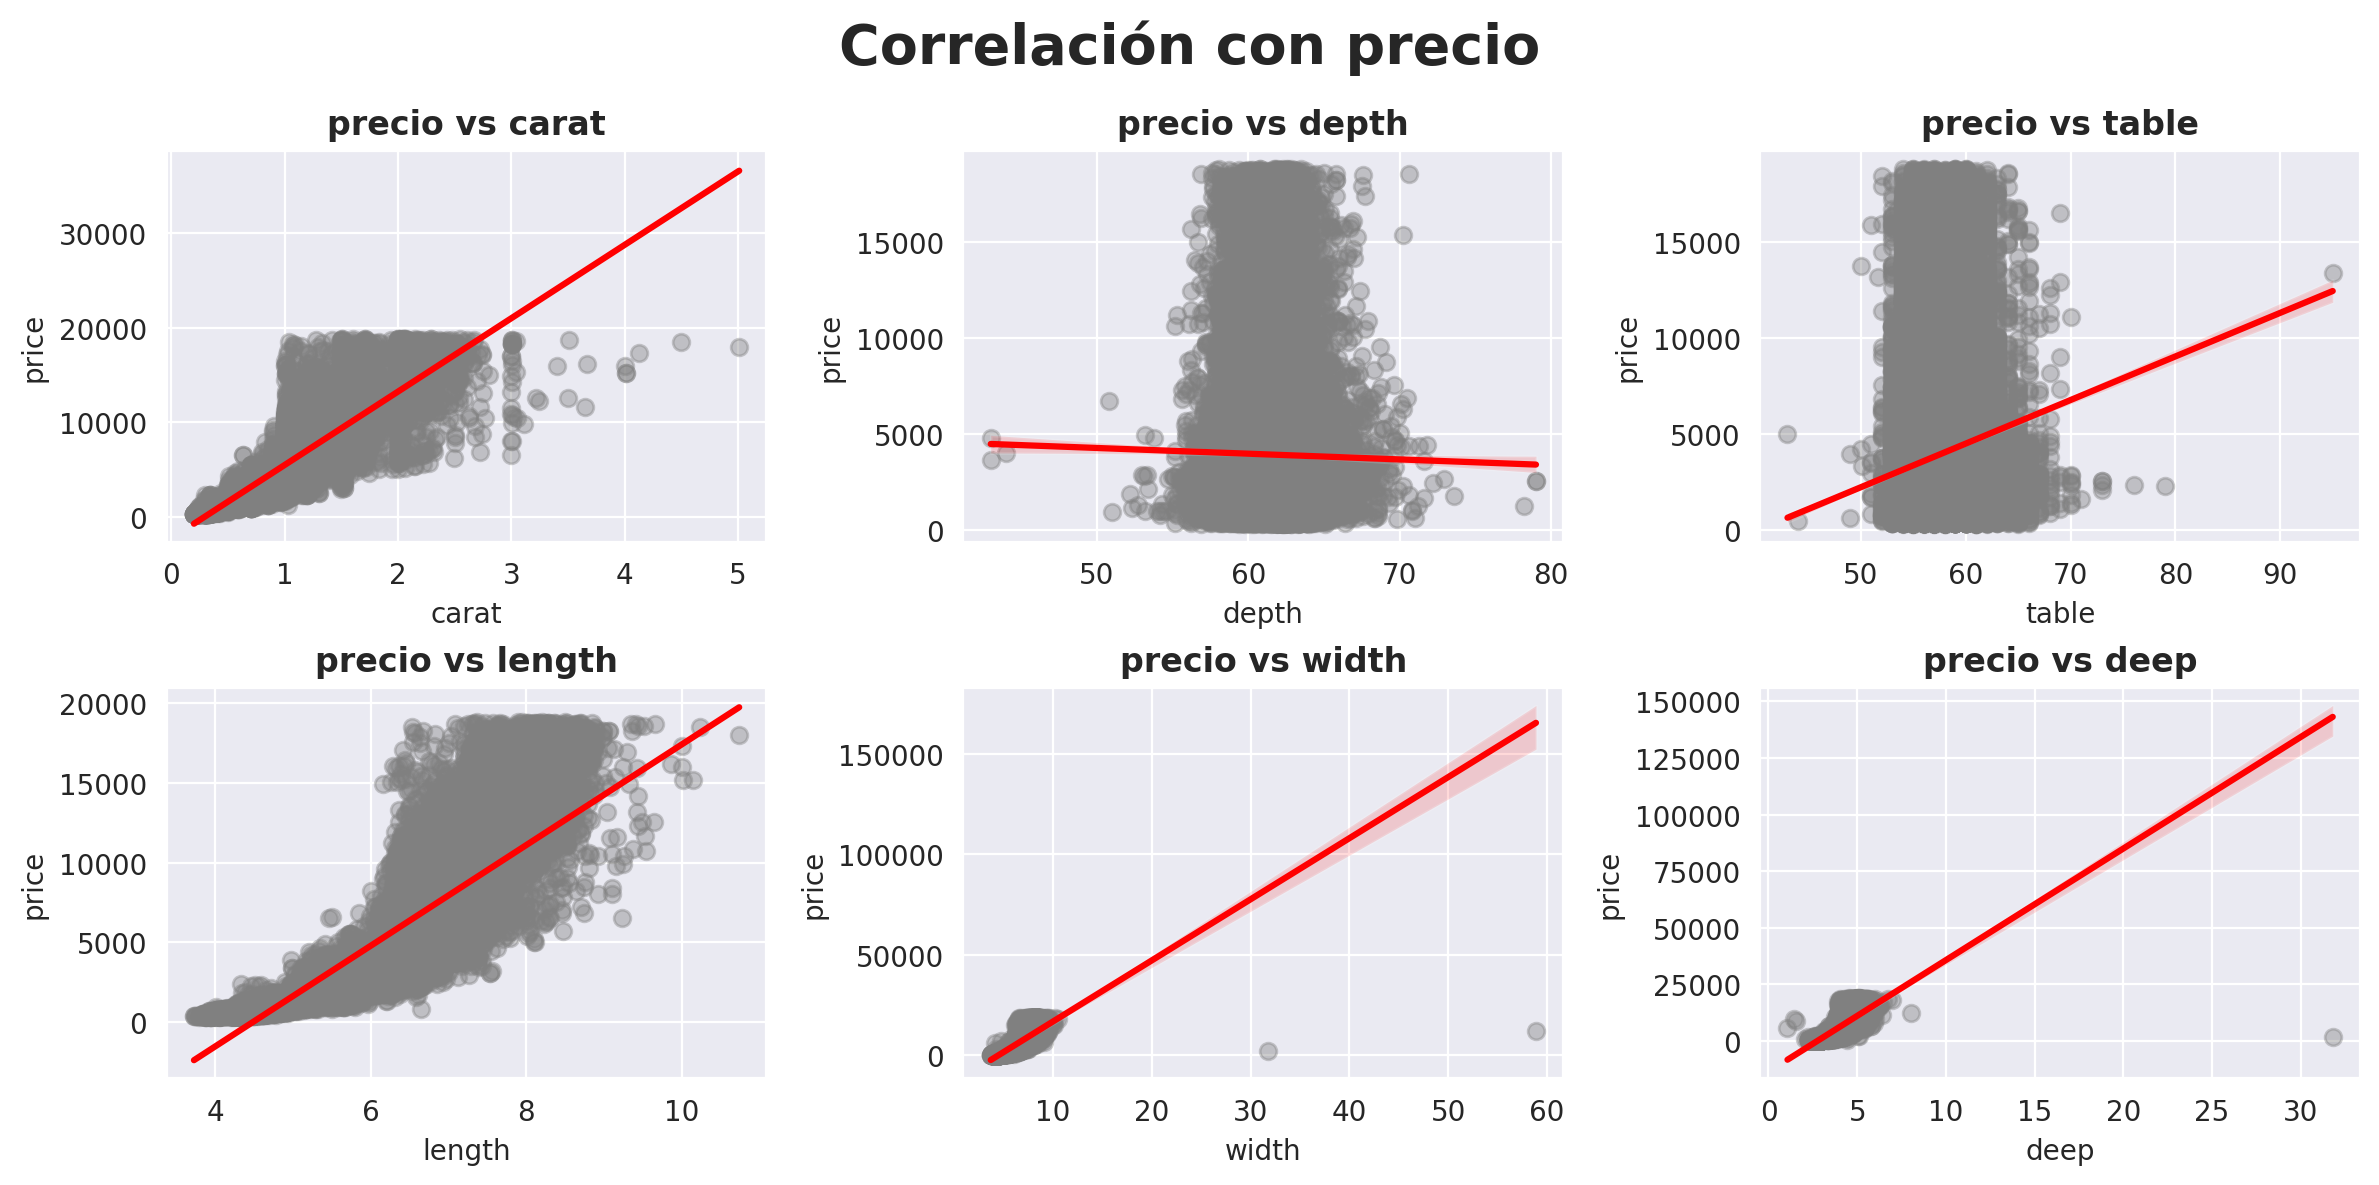

In [13]:
# Correlación de cada variable con la variable precio
# =====================================================
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6), dpi=200)
axes = axes.flat

for num, name in enumerate(numeric_cols):
    sns.regplot(
        data=data,
        x=name,
        y=data.price,
        color="gray",
        line_kws={"color": "red"},
        scatter_kws={"alpha": 0.4},
        ax=axes[num] 
    )
    axes[num].set_title(f"precio vs {name}", fontsize = 12, fontweight = "bold")

fig.tight_layout()
fig.subplots_adjust(top=0.87)
fig.suptitle('Correlación con precio', fontsize = 20, fontweight = "bold")
plt.show()


Las variables carat, width y deep, presentan outliers que afectan su relación con la variable objetivo pero, dichos valores atípicos no parecen deberse a un error, es decir, parecen reflejar una relación legítima con la variable objetivo, por lo cual se conservarán

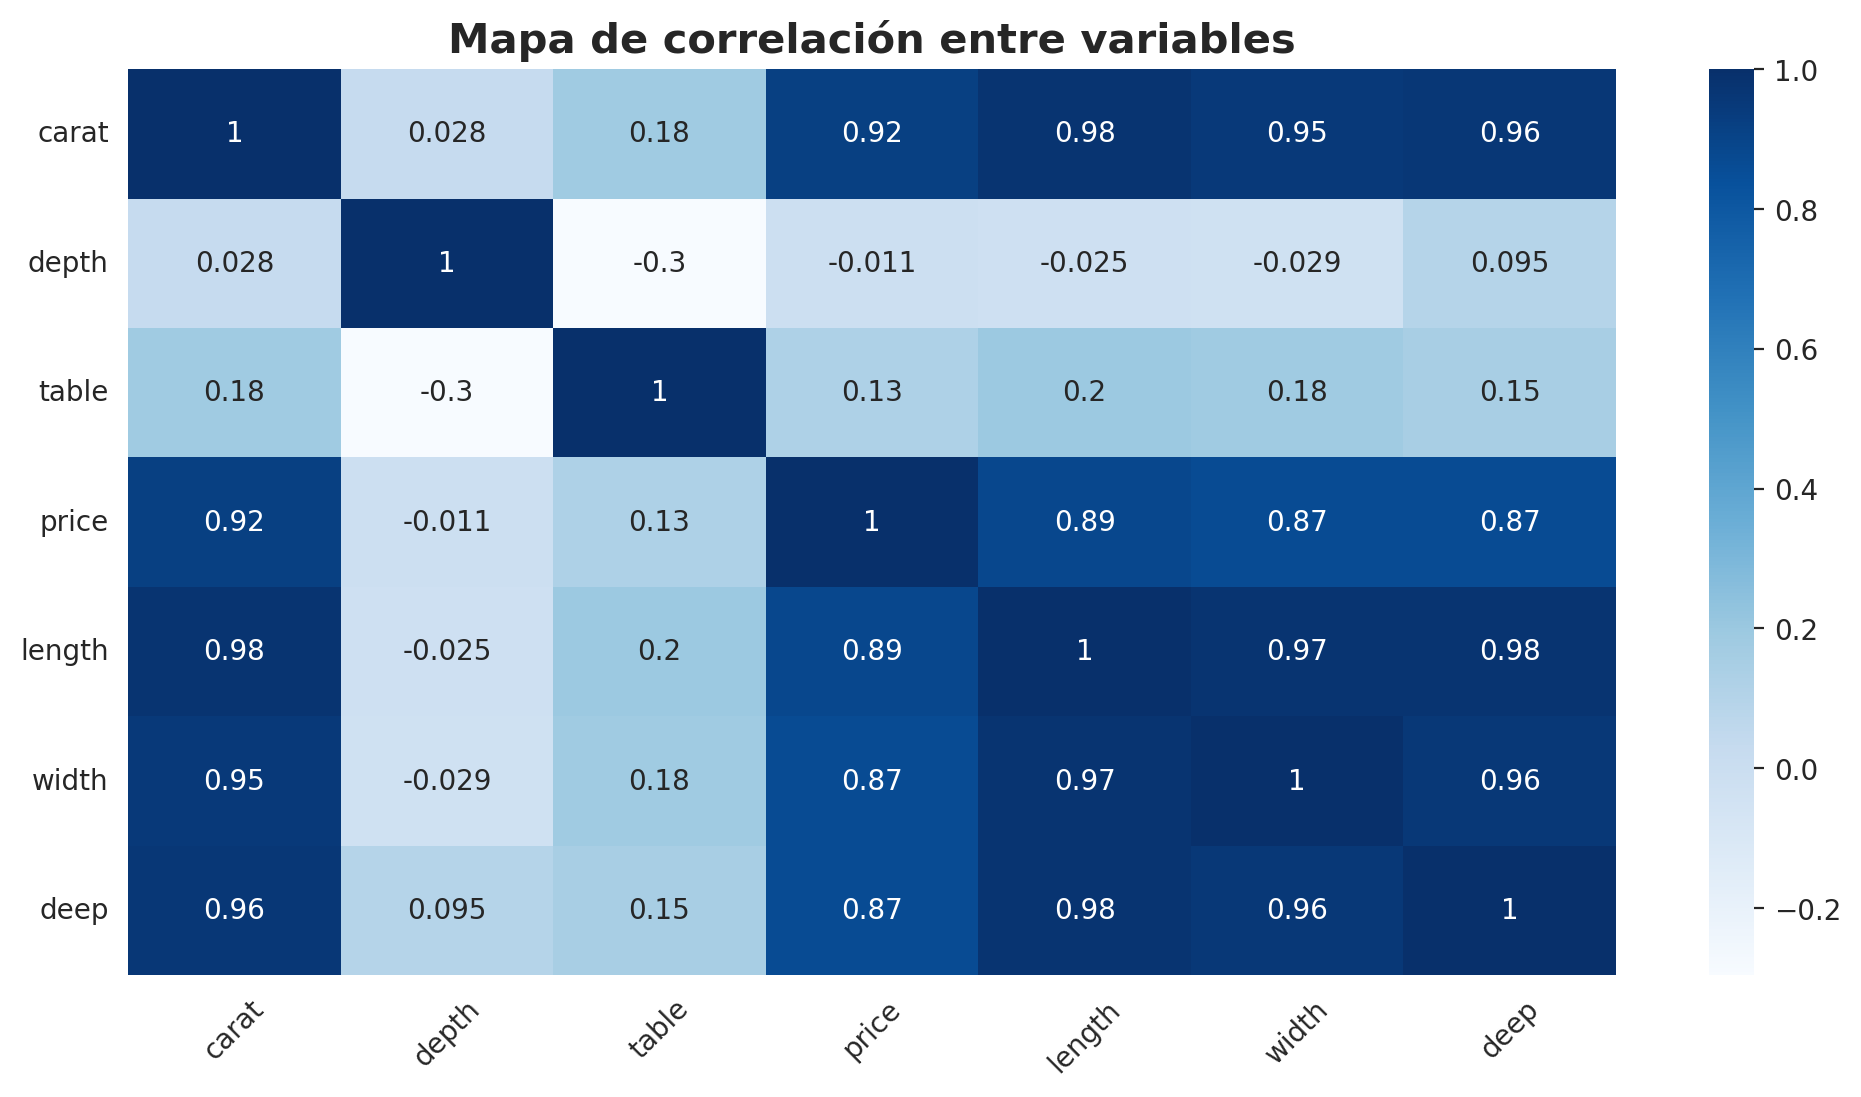

In [14]:
# Correlación de variables numéricas
# ====================================
plt.figure(figsize=(12, 6), dpi=200)
sns.heatmap(data.select_dtypes(["float", "int"]).corr(), annot=True, cmap="Blues")
plt.title("Mapa de correlación entre variables", 
          fontdict={"fontsize": 15, "fontweight": "bold"})
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Las variables length, width, deep y carat están altamente correlacionadas entre sí. A su vez, todas ellas tienen una alta correlación con la variable objetivo

### Análisis de variables cualitativas

In [15]:
data.select_dtypes(include=["object"]).describe()

,cut,color,clarity
count,53923,53923,53923
unique,5,7,8
top,Ideal,G,SI1
freq,21548,11284,13065


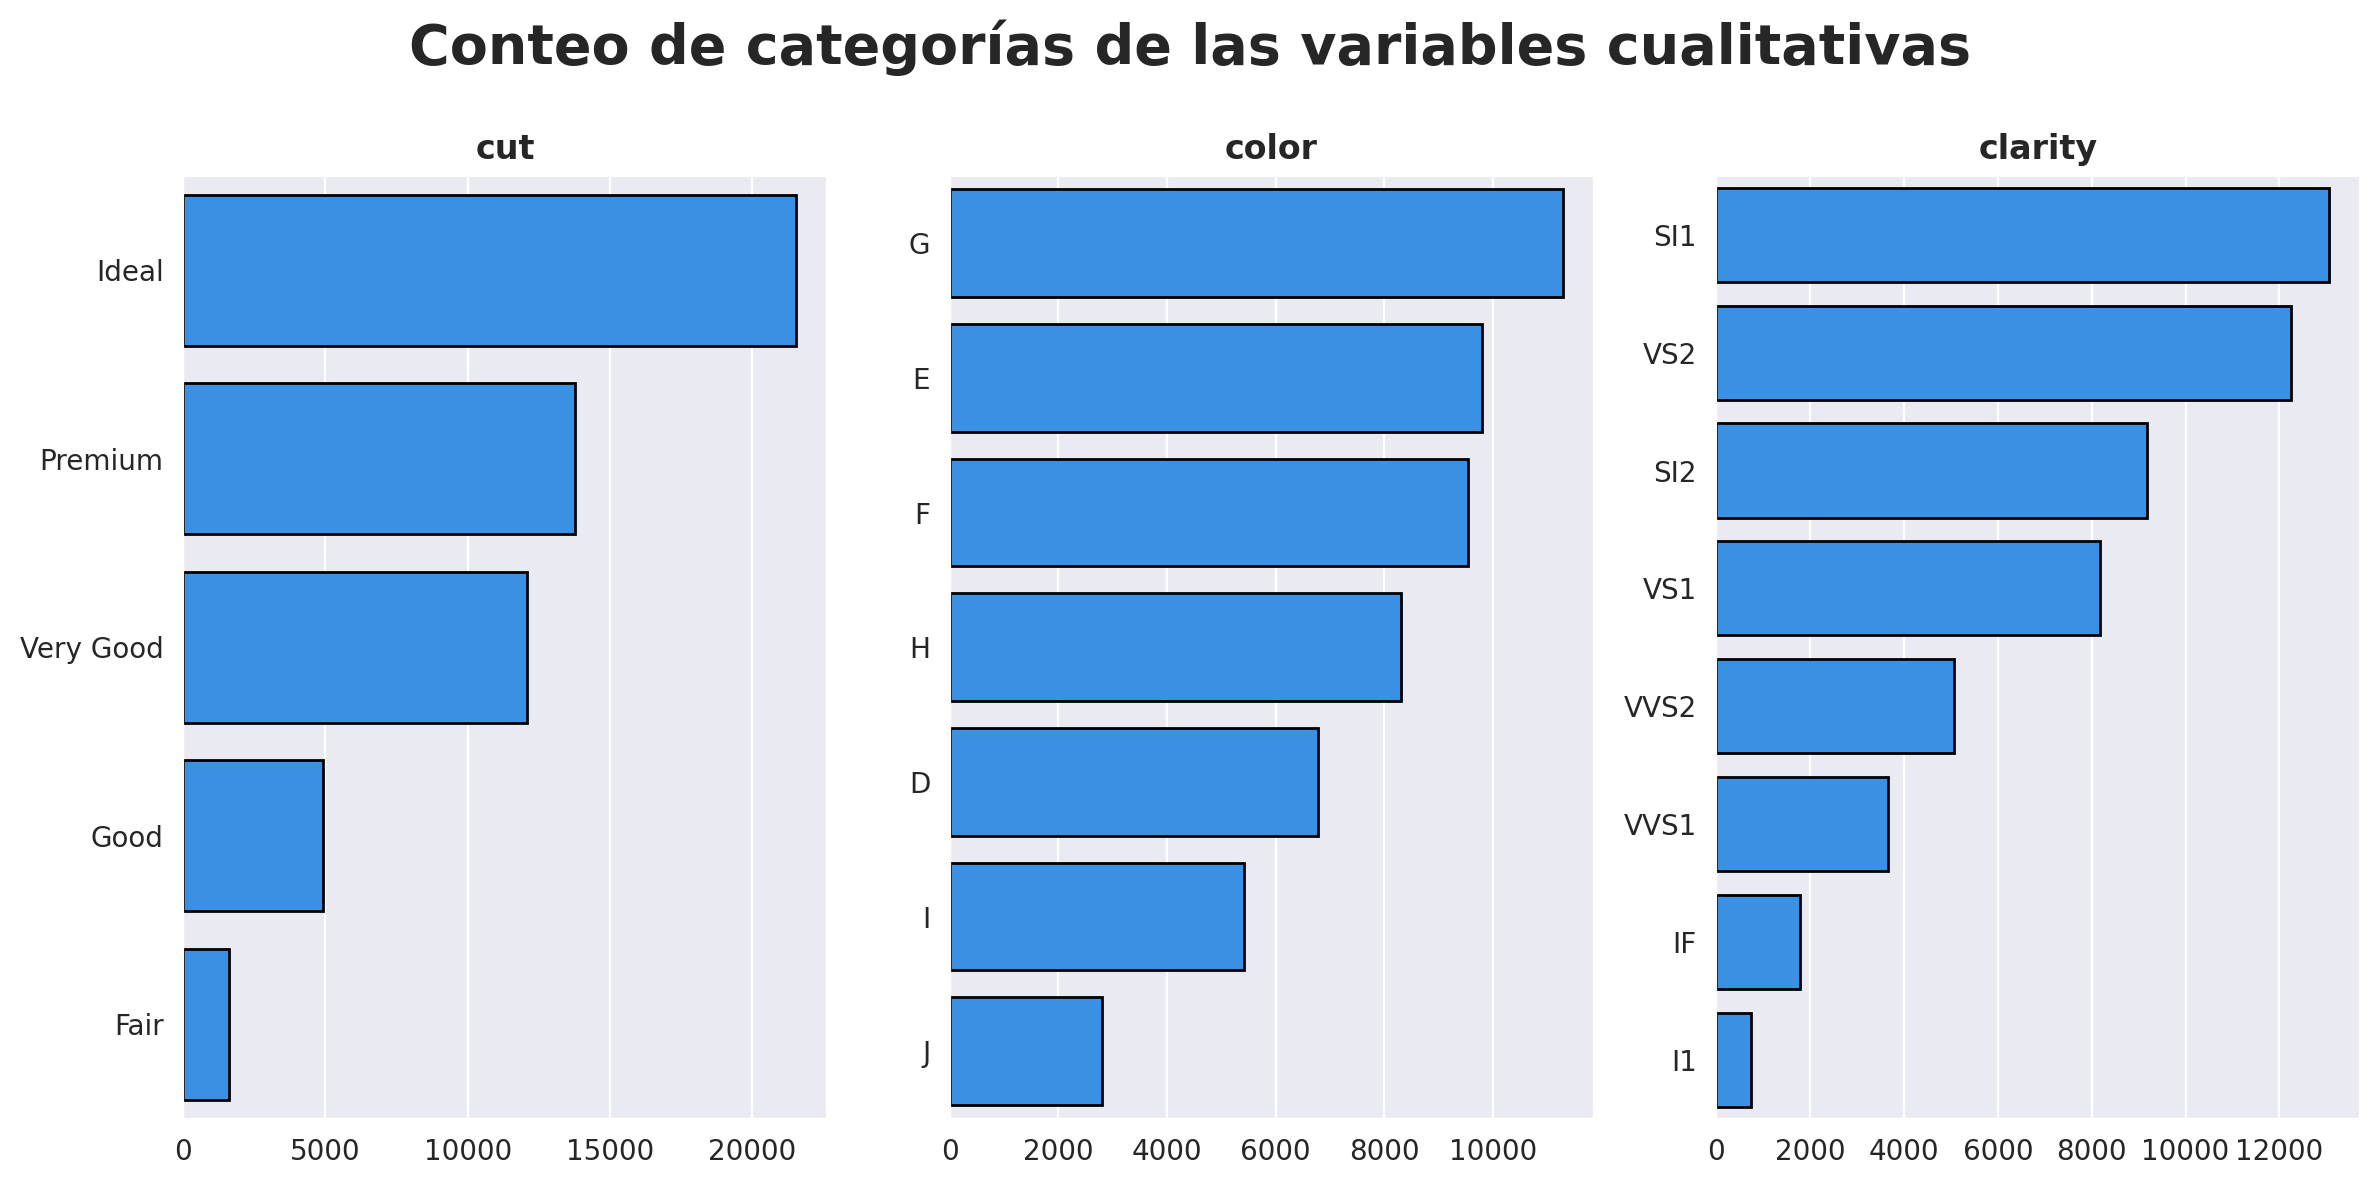

In [16]:
# Hitográma de las variables cualitativas
# =========================================
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6), dpi=200)
object_cols = data.select_dtypes(include=["object"]).columns
axes = axes.flat

for num, name in enumerate(object_cols):
    sns.barplot(x=data[name].value_counts().values, 
                y=data[name].value_counts().index, 
                color="#1E90FF", alpha=1, 
                edgecolor="k", ax=axes[num])
    axes[num].set_title(name, fontdict={"fontweight": "bold"})


fig.tight_layout()
fig.subplots_adjust(top=0.85)
fig.suptitle("Conteo de categorías de las variables cualitativas",
                fontsize = 20, fontweight = "bold")
plt.show()

Puesto que algunas categorías cuentan con poca representatividad, se crearán nuevas categorías que agrupen a las anteriores en tres posibles grupos de calidad: low, medium, high. 

La razón por la que se hará de este modo es porque, al moemnto de realizar la validación cruzada, se reducirá el riesgo de que en alguno de los pliegues no haya ningún dato de alguna de las categorías, lo cual traería errores de predcción.

In [17]:
data_classified = data.replace(
    {
    "D": "high", "E": "high", "F": "medium", 
    "G": "medium", "H": "low", "I": "low", 
    "J": "low", "IF": "high", "VVS1":"high", 
    "VVS2":"high", "VS1":"medium","VS2": "medium", 
    "SI1": "low", "SI2": "low", "I1": "low",
    "Fair": "low", "Good":"low", "Very Good":"low",
    "Premium": "medium", "Ideal": "high"
              }
            )

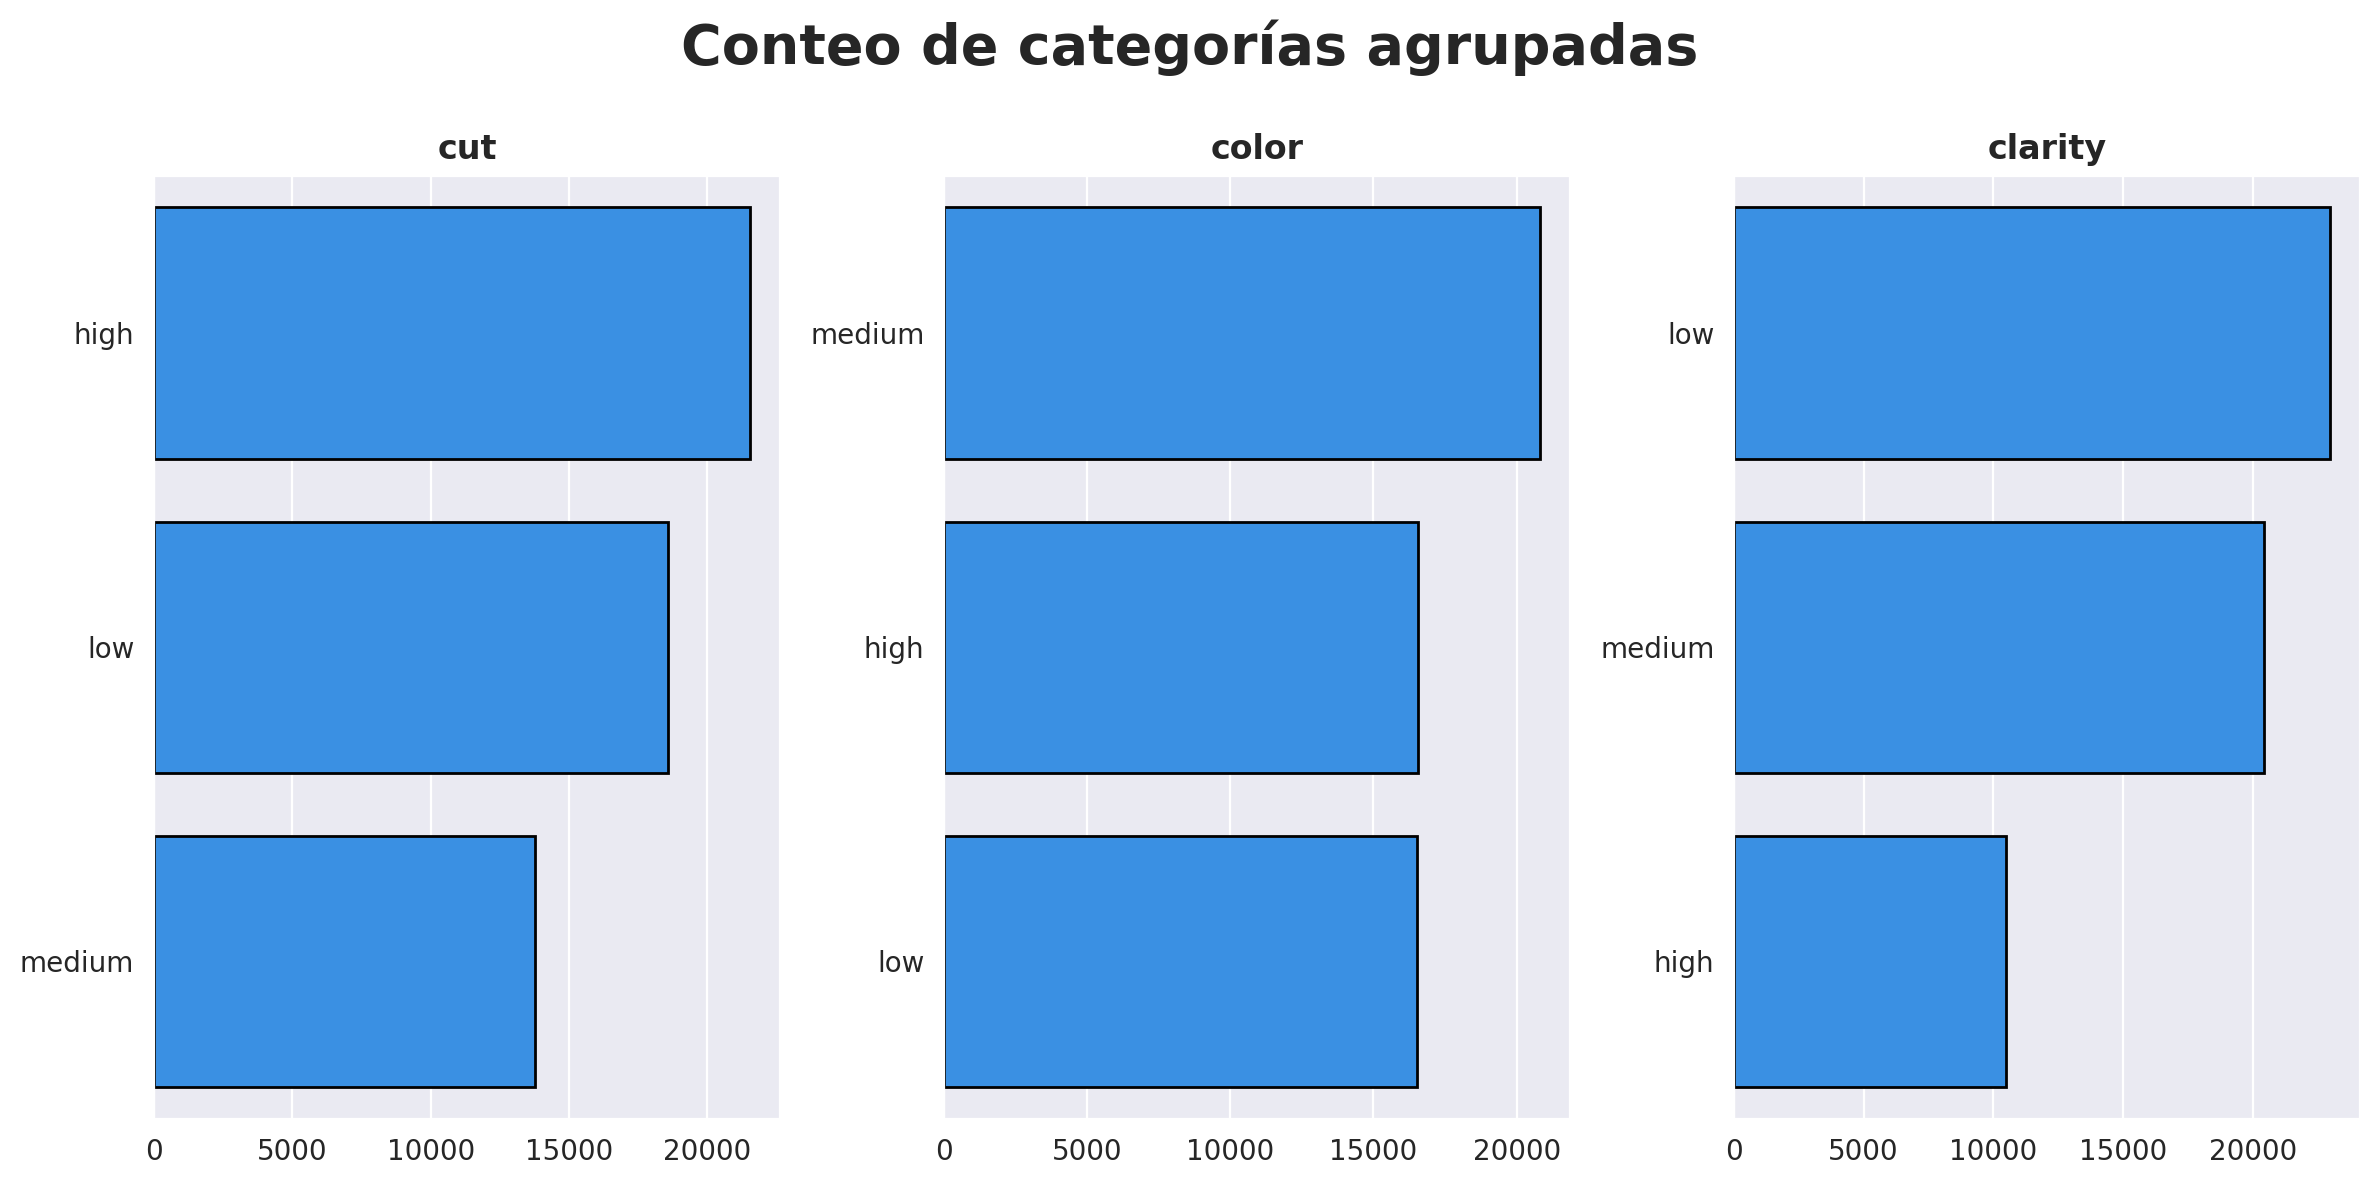

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6), dpi=200)
object_cols = data_classified.select_dtypes(include=["object"]).columns
axes.flat

for num, name in enumerate(object_cols):
    sns.barplot(x=data_classified[name].value_counts().values, 
                y=data_classified[name].value_counts().index, 
                color="#1E90FF", alpha=1, 
                edgecolor="k", ax=axes[num])
    axes[num].set_title(name, fontdict={"fontweight": "bold"})


fig.tight_layout()
fig.subplots_adjust(top=0.85)
fig.suptitle("Conteo de categorías agrupadas",
                fontsize = 20, fontweight = "bold")
plt.show()

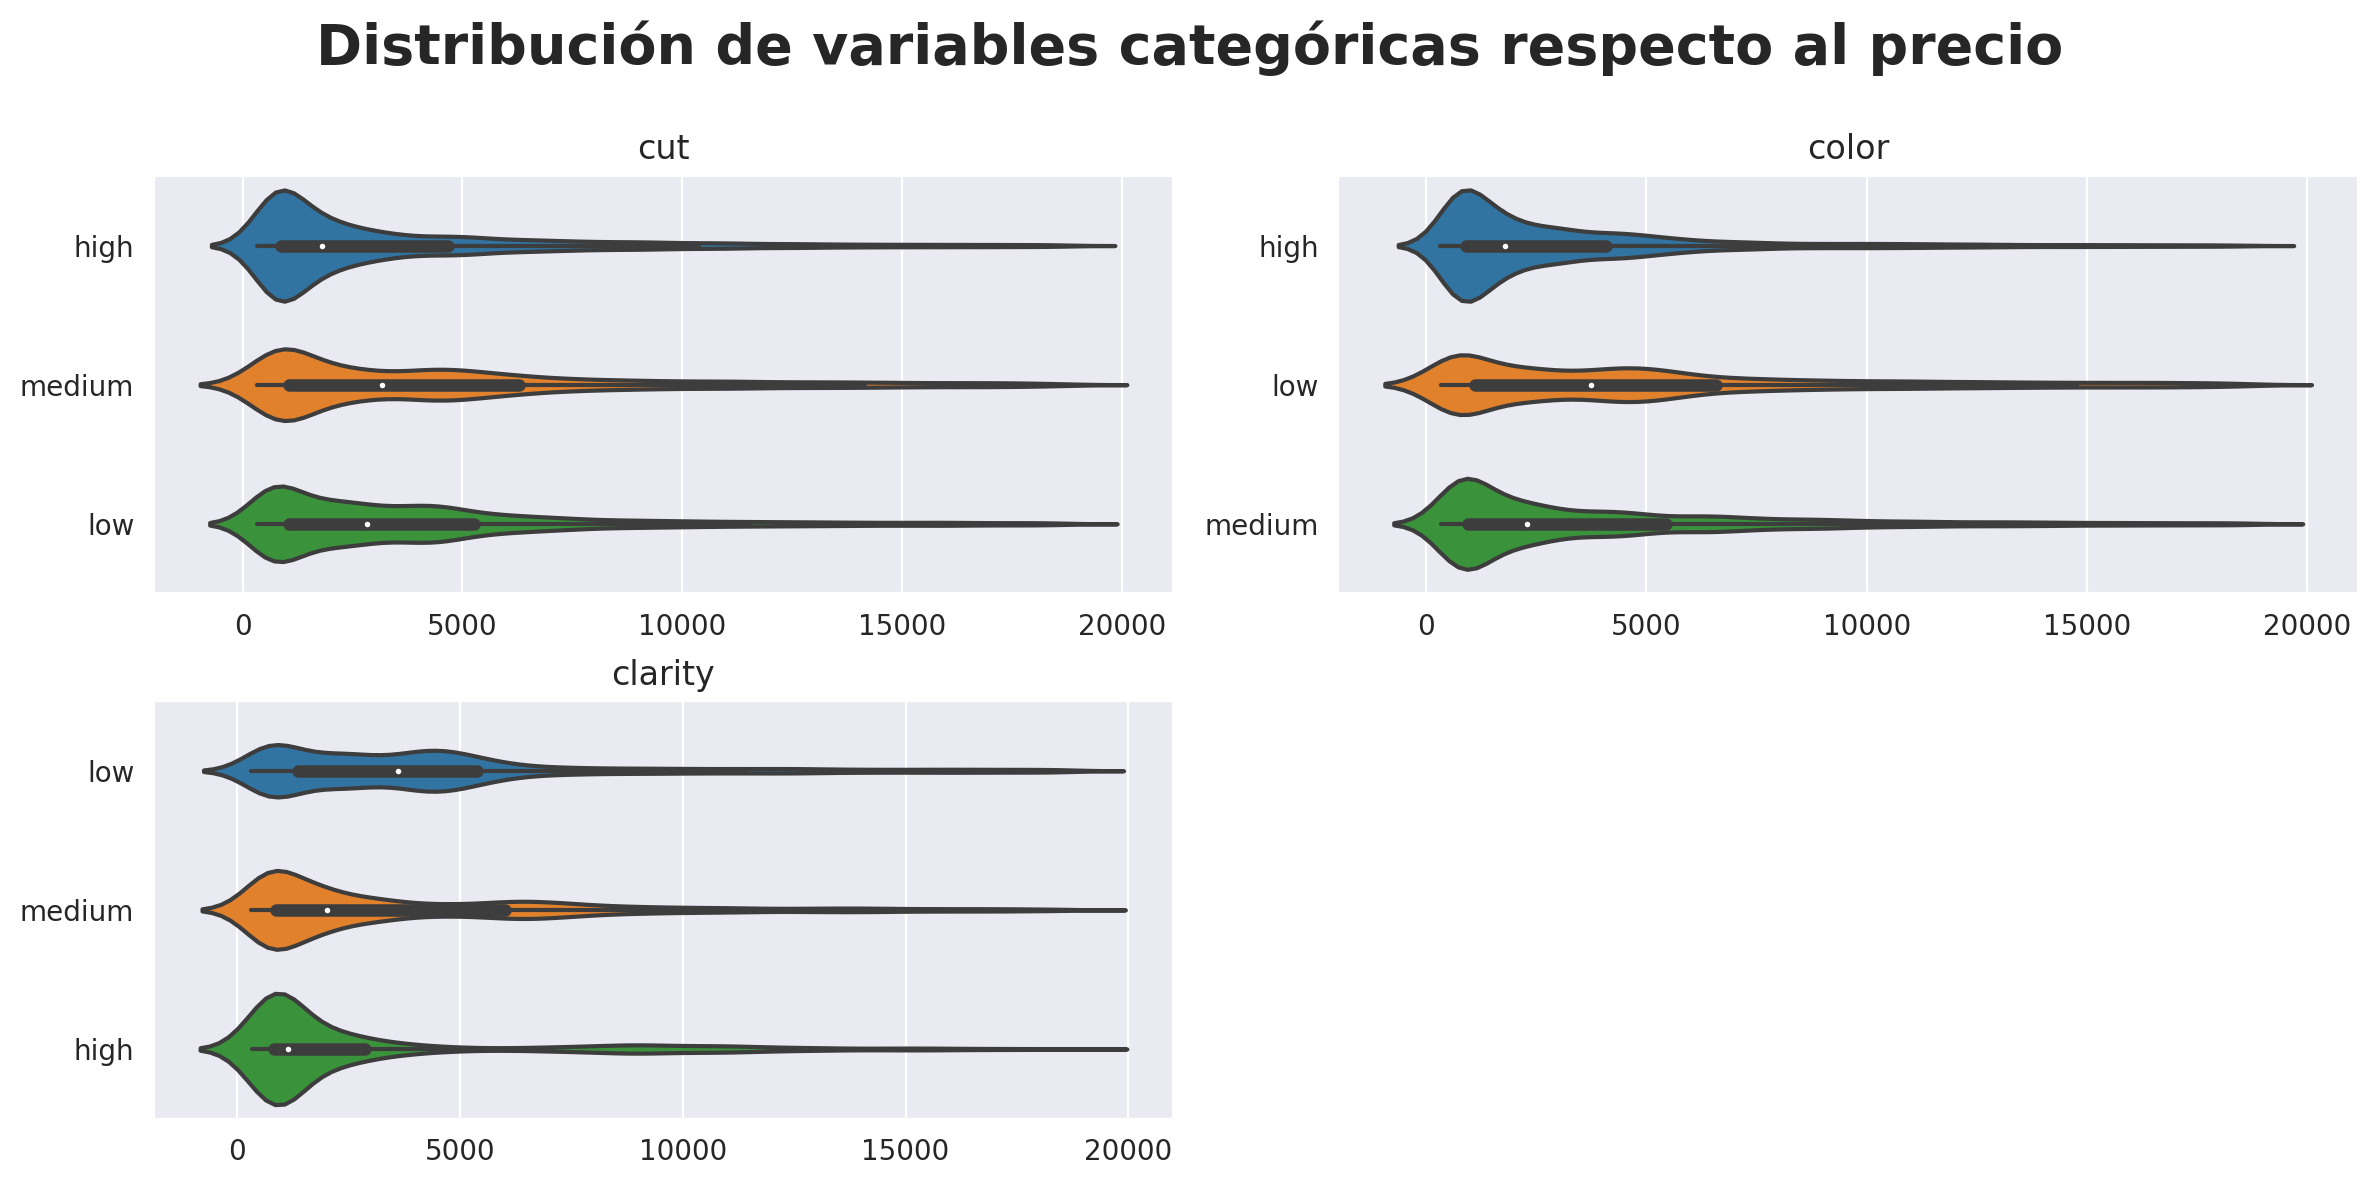

In [19]:
# Relación entre la variable objetivo y las variables cualitativas
# ================================================================
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6), dpi=200)
axes = axes.flat
for num, name in enumerate(object_cols):
    sns.violinplot(x=data_classified.price, 
                   y=data_classified[name],
                   ax=axes[num])
    axes[num].set_ylabel("")
    axes[num].set_xlabel("")
    axes[num].set_title(name)

for _ in [3]:
    fig.delaxes(axes[_])

fig.tight_layout()
fig.subplots_adjust(top=.85)
fig.suptitle("Distribución de variables categóricas respecto al precio",
                 fontsize=20, fontweight="bold")
plt.show()

## División train test

In [20]:
# Definiendo las variables del modelo
# ======================================
y = data_classified.price.values # Variable Objetivo
# Transformación logaritmica
y = np.log(y).reshape(-1, 1)
X = data_classified.drop("price", axis="columns")

print(y.shape, X.shape)

(53923, 1) (53923, 9)


In [21]:
# División de los datos en train y test
# =========================================
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.7,
    random_state=1234,
    shuffle=True
)

Es importante verificar que la variable objetivo en las particiones tienen distribuciones similares

In [22]:
print("Partición de entrenamiento")
print("---------------------------")
print(pd.Series(y_train.flatten()).describe())

Partición de entrenamiento
---------------------------
count    37746.000000
mean         7.786723
std          1.015728
min          5.786897
25%          6.851185
50%          7.786967
75%          8.579604
max          9.842835
dtype: float64


In [23]:
print("Partición de prueba")
print("---------------------------")
print(pd.Series(y_test.flatten()).describe())

Partición de prueba
---------------------------
count    16177.000000
mean         7.785647
std          1.011703
min          5.814131
25%          6.862758
50%          7.779467
75%          8.580919
max          9.841825
dtype: float64


# Creando el modelo

Para poder elegir modelo es necesario iniciar estableciendo una referencia o baseline. En este caso se tomará al modelo de regresión lineal como baseline

### Regresión Lineal 

In [24]:
# pipe: Procesado de datos + modelo
# =========================================
def preprossecing_data_and_making_pipe(model):
    # Se establecen las variables según su tipo
    cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.to_list()
    num_cols = X_train.select_dtypes(include=["float", "int"]).columns.to_list()

    # Lista de categorías para la transformación ordinal
    ordinal = [["low", "medium", "high"], 
               ["low", "medium", "high"], 
               ["low", "medium", "high"]]

    # Transformación de las variables numéricas
    num_transformer = Pipeline(
        steps=[
        ("scaler", StandardScaler())
        ]
    )

    # Transformación de las variables categóricas
    cat_transformer = Pipeline(
        steps=[
        ("ordinal", OrdinalEncoder(categories=ordinal, dtype="int"))
        ]
    )

    preprocessor = ColumnTransformer(
        transformers=[
        ("numeric", num_transformer, num_cols),
        ("categorical", cat_transformer, cat_cols)
        ], 
        remainder="passthrough"
    ).set_output(transform="pandas")

    pipe = Pipeline(
        steps=[
        ("preprocessing", preprocessor),
        ("model", model)
        ]
    )

    return pipe

In [25]:
# Ajustando el modelo
linear_pipe = preprossecing_data_and_making_pipe(LinearRegression()).fit(X_train, y_train)
# Guardando el modelo ajustado en la variable lienar_model
linear_model = linear_pipe.named_steps["model"]

In [26]:
# Estimadores de la regresión
print(f"intersección: {linear_model.intercept_[0].round()}")
for name, coef in zip(linear_model.feature_names_in_, linear_model.coef_.flatten()):
    print(f"{name}: {coef.round(4)}")

intersección: 7.0
numeric__carat: -0.5283
numeric__depth: 0.0725
numeric__table: 0.0066
numeric__length: 1.5269
numeric__width: 0.0263
numeric__deep: 0.0359
categorical__cut: 0.0213
categorical__color: 0.1426
categorical__clarity: 0.2382


In [53]:
# Valores observados vs predichos
linear_predict = linear_pipe.predict(X_test)
pd.DataFrame(
    {
    "y_real": np.exp((y_test).flatten()).round(3),
    "y_predicha": np.exp((linear_predict).flatten()).round(3)
    }
)

,y_real,y_predicha
0,2555.0,2769.339
1,5539.0,4074.699
2,4853.0,4826.065
3,911.0,653.576
4,954.0,1101.837
...,...,...
16172,850.0,1057.761
16173,12108.0,9020.325
16174,833.0,729.210
16175,568.0,670.295


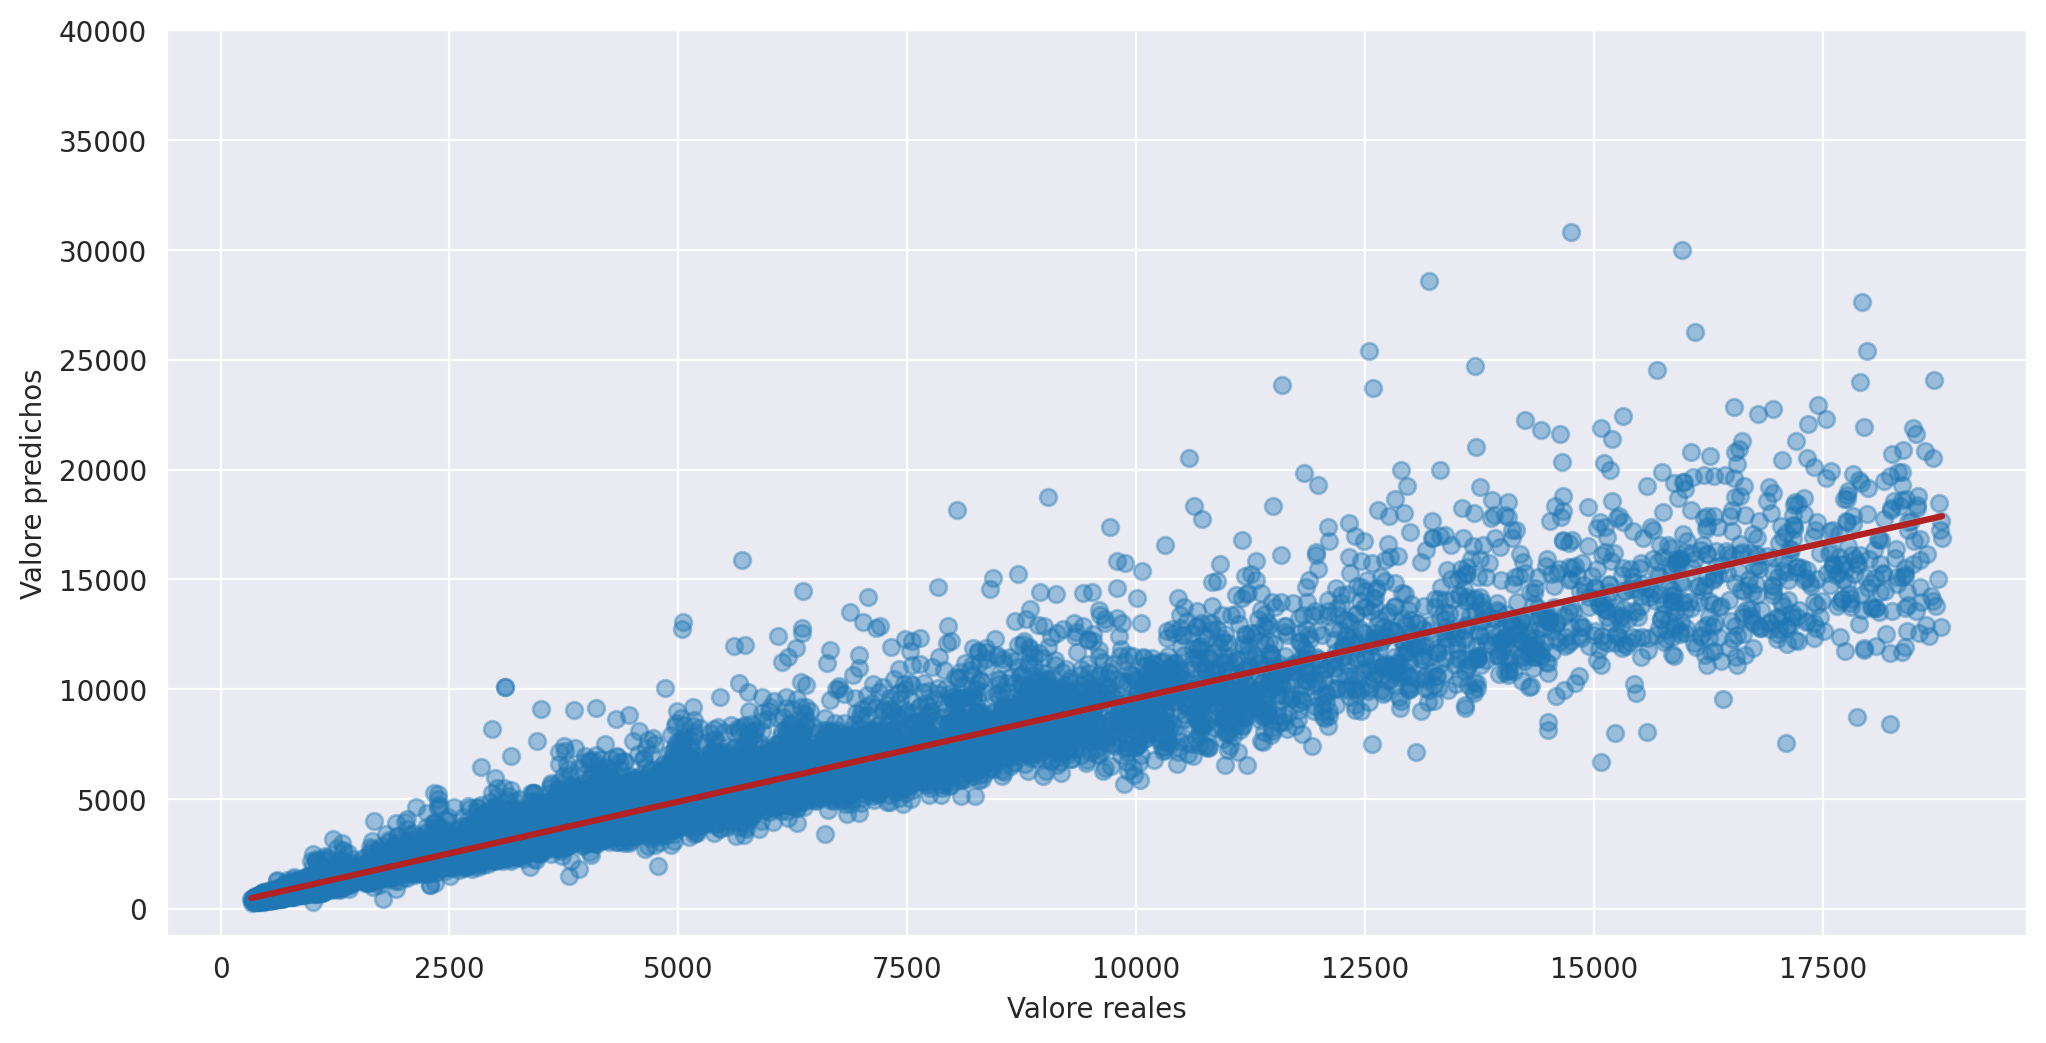

In [56]:
plt.figure(dpi=200)
sns.regplot(x=np.exp(y_test.flatten()), 
            y=np.exp(linear_predict.flatten()),
            line_kws={"color":"firebrick"},
            scatter_kws={"alpha":0.4})
plt.xlabel("Valore reales", 
           fontdict={"size": 10})
plt.ylabel("Valore predichos", 
           fontdict={"size": 10})
plt.ylim(top=40000)
plt.show()

Los errores se dispersan cuando se predicen valores grandes

In [57]:
# Calculando las métricas para validar el modelo
# ===============================================
print(f"R2 = {r2_score(y_test, linear_predict)}")
print(f"MAE = {mean_absolute_error(y_test, linear_predict)}")
print(f"RMSE = {mean_squared_error(y_test, linear_predict, squared=False)}")

R2 = 0.9700854538438687
MAE = 0.13447270025172842
RMSE = 0.17497691568359466


Estas métricas servirán como referncia para comprar el desempeño del resto de los modelos 

# Modelos de regresión con penalización

Existen variaciones del modelo de regresión lineal estandar, que incluyen una penalización sobre los coeficientes de la regresión con el fin de evitar el sobre ajuste del modelo. A continuación se exploran los resultados con estos modelos.

## Regresión Ridge

In [30]:
ridge_pipe = preprossecing_data_and_making_pipe(RidgeCV(
    alphas=np.logspace(-10, 1, 20))
    ).fit(X_train, y_train)

In [58]:
ridge_model = ridge_pipe.named_steps["model"]
print("El mejor valor de alpha encontrado es: ", "{:.10f}".format(ridge_model.alpha_))

El mejor valor de alpha encontrado es:  0.0000000001


El alpha óptimo que se encontró es muy cercano a cero, lo que significa que la penalización del modelo es practicamante nula por lo que no hay diferencia significativa entre el modelo de regresión convencional y el modelo de regresión Ridge

## Regresión Lasso

In [59]:
lasso_pipe = preprossecing_data_and_making_pipe(LassoCV(
    alphas=np.logspace(-10, 1, 20),
    cv=RepeatedKFold(n_splits=5, n_repeats=10))
    ).fit(X_train, y_train)

In [61]:
lasso_model = lasso_pipe.named_steps["model"]
print("El mejor valor de alpha encontrado es: ", "{:.10f}".format(lasso_model.alpha_))

El mejor valor de alpha encontrado es:  0.0033598183


In [62]:
# Estimadores de la regresión
print(f"intersección: {lasso_model.intercept_}")
for name, coef in zip(lasso_model.feature_names_in_, lasso_model.coef_.flatten()):
    print(f"{name}: {coef.round(4)}")

intersección: 7.4605295146491635
numeric__carat: -0.3596
numeric__depth: 0.0561
numeric__table: 0.0
numeric__length: 1.3572
numeric__width: 0.0204
numeric__deep: 0.0387
categorical__cut: 0.0136
categorical__color: 0.1387
categorical__clarity: 0.2242


El estimador de table es cero, lo que significa que esa variable ha sido eliminada del modelo

In [63]:
# Valores observados vs predichos
lasso_predict = lasso_pipe.predict(X_test)
pd.DataFrame(
    {
    "y_real": np.exp((y_test).flatten()).round(3),
    "y_predicha": np.exp((linear_predict).flatten()).round(3)
    }
)

,y_real,y_predicha
0,2555.0,2769.339
1,5539.0,4074.699
2,4853.0,4826.065
3,911.0,653.576
4,954.0,1101.837
...,...,...
16172,850.0,1057.761
16173,12108.0,9020.325
16174,833.0,729.210
16175,568.0,670.295


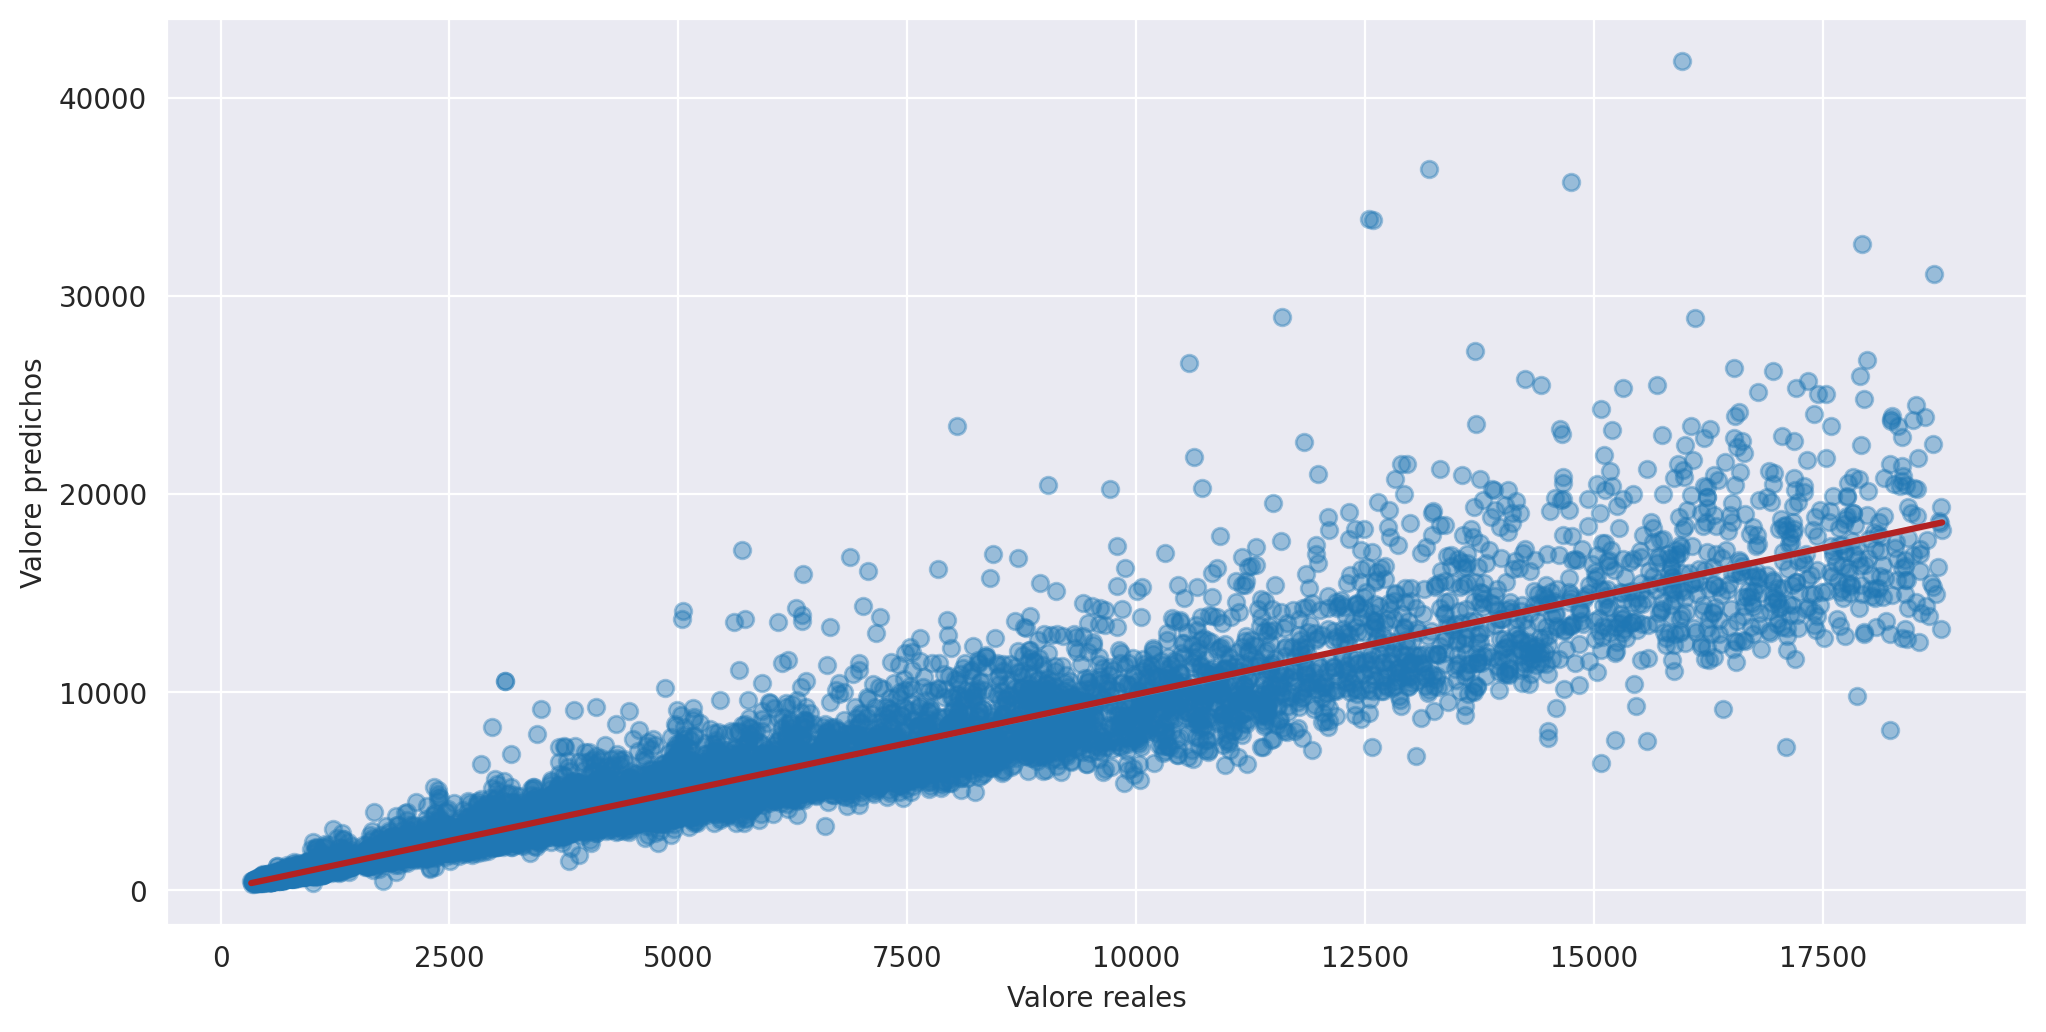

In [65]:
plt.figure(dpi=200)
sns.regplot(x=np.exp(y_test.flatten()), 
            y=np.exp(lasso_predict.flatten()),
            line_kws={"color":"firebrick"},
            scatter_kws={"alpha":0.4})
plt.xlabel("Valore reales", 
           fontdict={"size": 10})
plt.ylabel("Valore predichos", 
           fontdict={"size": 10})
plt.show()

Los errores siguen teniendo una mayor disperción cuando se predicen valores más grandes, sin embargo la disperción con el modelo lasso es ligeramente menor que en el modelo de regresión lineal estandar

In [67]:
# Calculando las métricas para validar el modelo
# ===============================================
print(f"R2 = {r2_score(y_test, lasso_predict)}")
print(f"MAE = {mean_absolute_error(y_test, lasso_predict)}")
print(f"RMSE = {mean_squared_error(y_test, lasso_predict, squared=False)}")

R2 = 0.9687398573522455
MAE = 0.1375410984949308
RMSE = 0.1788689779677871


# Regresión Polinomial

In [68]:
# pipe: Procesado de datos + modelo
# =========================================
# Se establecen las variables según su tipo
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.to_list()
num_cols = X_train.select_dtypes(include=["float", "int"]).columns.to_list()
# Lista de categorías para la transformación ordinal
ordinal = [["low", "medium", "high"], 
           ["low", "medium", "high"], 
           ["low", "medium", "high"]]

# Transformación de las variables numéricas
num_trandformer = Pipeline(
    steps=[
    ("scaler", StandardScaler())
    ]
)

# Transformación de las variables categóricas
cat_trandformer = Pipeline(
    steps=[
    ("ordinal", OrdinalEncoder(categories=ordinal, dtype="int"))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
    ("numeric", num_trandformer, num_cols),
    ("categorical", cat_trandformer, cat_cols)
    ], 
    remainder="passthrough"
).set_output(transform="pandas")


In [69]:
# Se transforman los datos para entrenar el modelo
# ===================================================
data_processed = preprocessor.fit_transform(X_train)

In [70]:
# transformación polinomial y definición del modelo
# =====================================================
poly_pipe = make_pipeline(PolynomialFeatures(2), 
                          LassoCV(alphas=np.logspace(-10, 1, 20),
                                  cv=RepeatedKFold(n_splits=5, n_repeats=10)))

In [71]:
# ajuste del modelo
# ========================
_ = poly_pipe.fit(data_processed, y_train)

In [73]:
# Predictores con estimadores distintos a cero
# =================================================
poly_features = poly_pipe.named_steps["polynomialfeatures"]
poly_model = (poly_pipe.named_steps["lassocv"])
# Accediendo a los nombres de las variables generadas por el modelo
poly_var_names = poly_features.get_feature_names_out(
    input_features=poly_pipe.feature_names_in_)

print(f"Variables del modelo: {sum(poly_model.coef_ != 0)}")
print("=========================================\n")
# print(f"Variables distintas a cero")
print(f"Intercección: {poly_model.intercept_}")
for name, value in zip(poly_var_names, poly_model.coef_):
    if value != 0:
        print(f"{name}: {value}")

Variables del modelo: 24

Intercección: 7.689746992637331
numeric__carat: 0.35359571976943144
numeric__length: 0.5857871919766415
numeric__width: 0.050258593216119675
numeric__deep: 0.11560576767336031
categorical__color: 0.07795114689831088
categorical__clarity: 0.12812543299767704
numeric__carat numeric__length: -0.113728033635137
numeric__depth^2: -0.007172619655370931
numeric__depth numeric__table: 0.0072958531318677725
numeric__depth numeric__deep: -0.0072734646940973
numeric__depth categorical__cut: 0.00445512916235542
numeric__depth categorical__color: 0.0017390241724645635
numeric__table^2: -0.00020610426155030166
numeric__table numeric__length: -0.007206029917539093
numeric__length^2: -0.021113992411686704
numeric__length categorical__clarity: 0.029574293881656128
numeric__width^2: -0.0013056869983534565
numeric__deep^2: -0.004461054959040482
numeric__deep categorical__color: 0.03305511142848471
categorical__cut^2: 0.00023987166578171636
categorical__cut categorical__color: 0.

In [74]:
print(f"Valor óptimo de alpha {poly_model.alpha_}")

Valor óptimo de alpha 0.003359818286283788


In [75]:
# Prediciendo valores de entrenamiento
# ======================================
poly_predict = poly_pipe.predict(preprocessor.transform(X_test))
# Valores reales vs valores de entrenamiento
pd.DataFrame(
    {
    "y_real": np.exp(y_test.flatten()).round(3),
    "y_predict": np.exp(poly_predict.flatten()).round(3)
    }
)

,y_real,y_predict
0,2555.0,2743.928
1,5539.0,4477.995
2,4853.0,4782.401
3,911.0,653.950
4,954.0,1107.967
...,...,...
16172,850.0,1017.067
16173,12108.0,9490.058
16174,833.0,810.315
16175,568.0,639.627


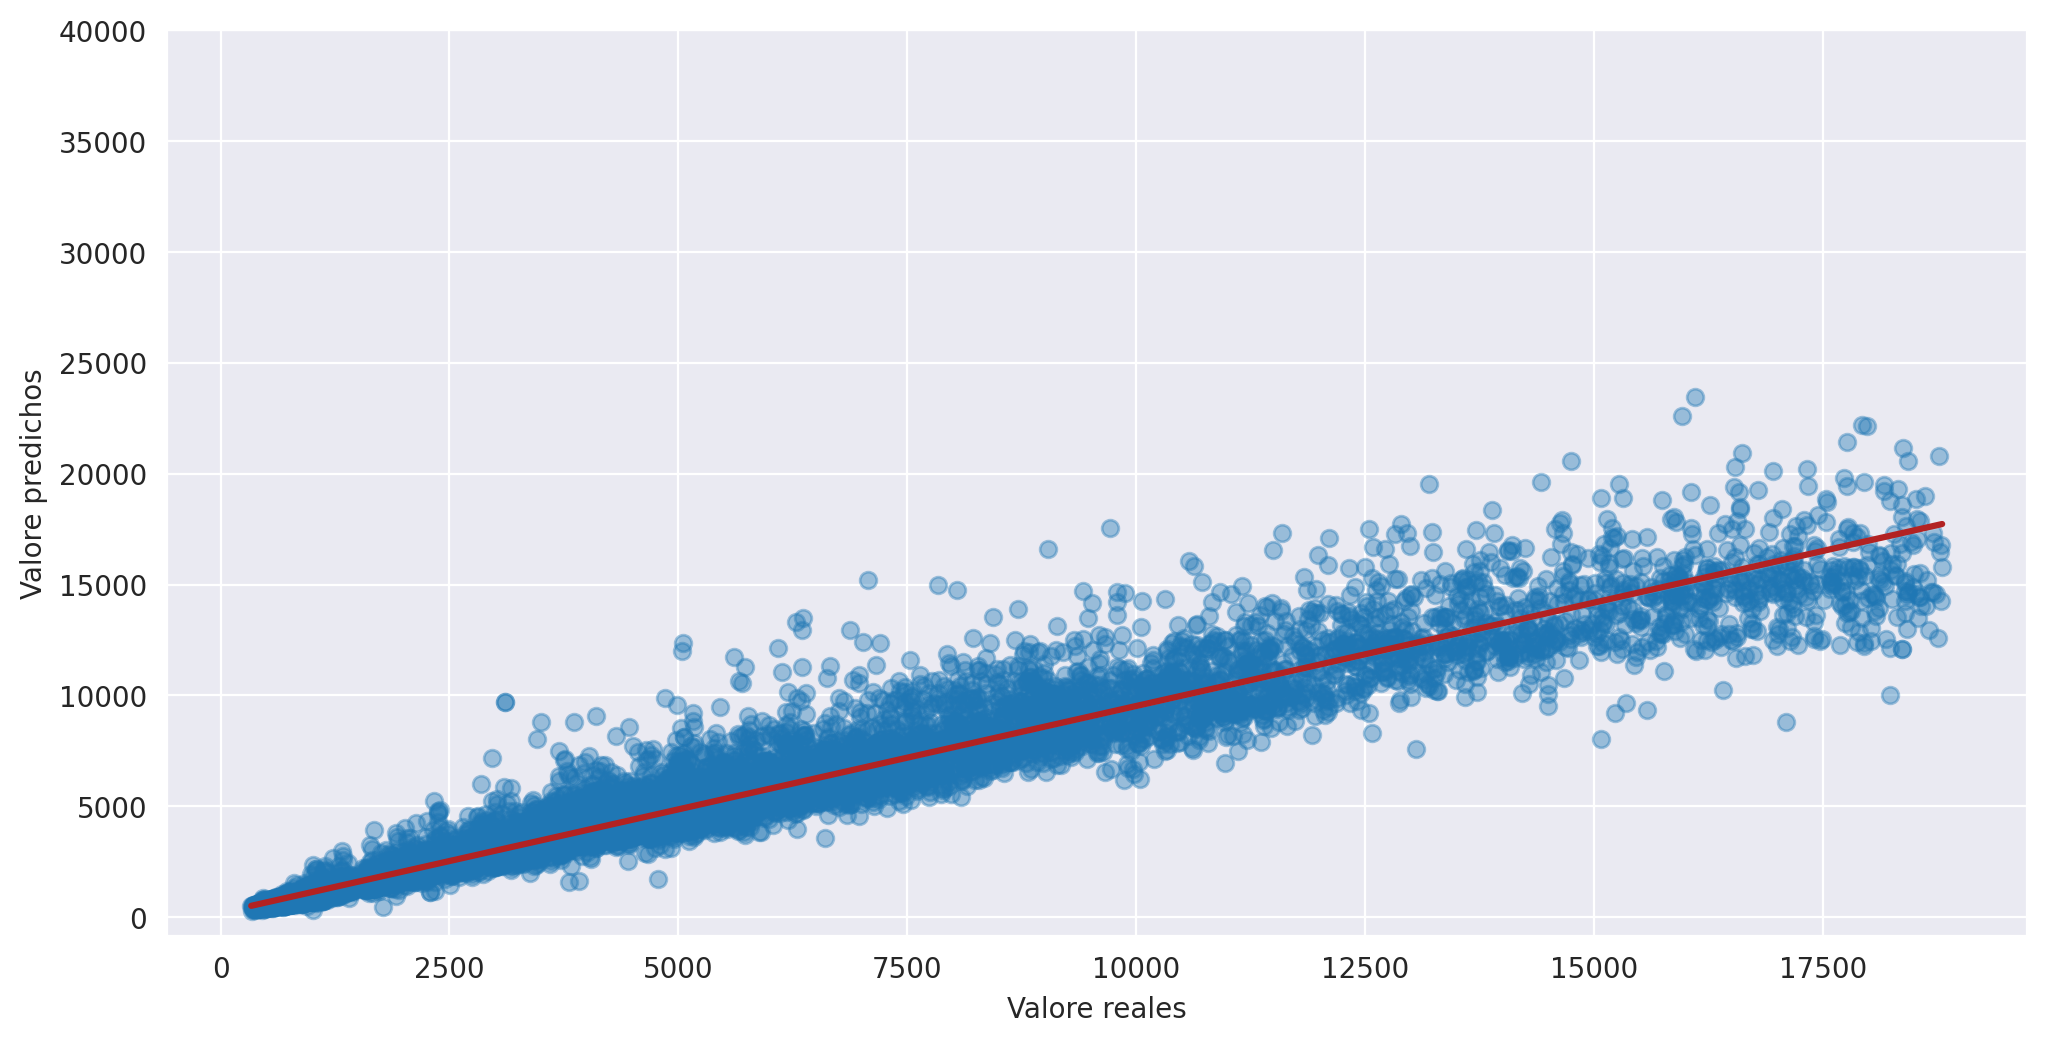

In [78]:
plt.figure(dpi=200)
sns.regplot(x=np.exp(y_test.flatten()), 
            y=np.exp(poly_predict.flatten()),
            line_kws={"color":"firebrick"},
            scatter_kws={"alpha":0.4})
plt.xlabel("Valore reales", 
           fontdict={"size": 10})
plt.ylabel("Valore predichos", 
           fontdict={"size": 10})
plt.ylim(top=40000)
plt.show()

In [79]:
# Calculando las métricas para validar el modelo
# ===============================================
print(f"R2 = {r2_score(y_test, poly_predict)}")
print(f"MAE = {mean_absolute_error(y_test, poly_predict)}")
print(f"RMSE = {mean_squared_error(y_test, poly_predict, squared=False)}")

R2 = 0.9746657844698345
MAE = 0.12455986851933147
RMSE = 0.16102498903244636


In [80]:
# Residuos del modelo
# ===========================
poly_resid = y_test.flatten() - poly_predict

In [81]:
poly_resid

array([-0.0713382 ,  0.21263849,  0.01465445, ...,  0.02761003,
       -0.11876436, -0.06625953])

# Comparación de los modelos

In [48]:
# Resumen de resultados
# =========================
pd.DataFrame(
   (np.array([[r2_score(y_test, linear_predict), 
           mean_absolute_error(y_test, linear_predict), 
           mean_squared_error(y_test, linear_predict, squared=False),
           np.count_nonzero((linear_model.coef_ != 0))], 

           [r2_score(y_test, lasso_predict), 
           mean_absolute_error(y_test, lasso_predict), 
           mean_squared_error(y_test, lasso_predict, squared=False),
           np.count_nonzero((lasso_model.coef_ != 0))],

           [r2_score(y_test, poly_predict), 
           mean_absolute_error(y_test, poly_predict), 
           mean_squared_error(y_test, poly_predict, squared=False),
           np.count_nonzero((poly_model.coef_ != 0))]])), 
           
   index=["Linear_model", "Lasso_model", "Polynomial_model"],
   columns=["R2", "MAE", "RMSE", "Variables_Totales"]
)

,R2,MAE,RMSE,Variables_Totales
Linear_model,0.970085,0.134473,0.174977,9.0
Lasso_model,0.968740,0.137541,0.178869,8.0
Polynomial_model,0.974666,0.124560,0.161025,24.0


# Conslusión

Con base en las métricas utilizadas para evaluar los modelos, podemos decir que el modelo que mejor se ajusta a los datos es el modelo polinomial. El modelo explica el 97.46% de la varianza de la variable objetivo

Es claro que la relación que guardan las variables predictoras con la variable objetivo, no es lineal, por lo cual la regresión polinomial se ajusta mejor al comportamiento de estos.

Si bien, todos los modelos tienen un rendimiento similar, en los modelos de regresión lineal estandar y Lasso los errores van creciendo conforme se busca predecir valores más grandes, mientras que los errores en las predicciones con el modelo polinomial se mantienen relativamente pequeños incluso al predecir valores grandes.


# información de sesión

In [82]:
import session_info
session_info.show(html=False)

-----
matplotlib          3.4.3
numpy               1.20.3
pandas              1.4.2
seaborn             0.11.2
session_info        1.0.0
sklearn             1.3.dev0
statsmodels         0.12.2
-----
IPython             7.29.0
jupyter_client      6.1.12
jupyter_core        4.8.1
jupyterlab          3.2.1
notebook            6.4.5
-----
Python 3.9.7 (default, Sep 16 2021, 13:09:58) [GCC 7.5.0]
Linux-5.15.90.1-microsoft-standard-WSL2-x86_64-with-glibc2.31
-----
Session information updated at 2023-05-26 17:48
